In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
pwd

'/home/nakyung/projects/BDAIFin/notebooks'

In [3]:
import os
os.chdir("..")

In [4]:
import pandas as pd
test = pd.read_parquet("data/online/test_raw.parquet")
train = pd.read_parquet("data/online/train_oss.parquet")

In [5]:
print(test.shape)
print(test.info())
test

(178154, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178154 entries, 0 to 178153
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        178154 non-null  int64  
 1   card_id                          178154 non-null  int64  
 2   amount                           178154 non-null  float32
 3   merchant_id                      178154 non-null  int64  
 4   current_age                      178154 non-null  int64  
 5   retirement_age                   178154 non-null  int64  
 6   birth_year                       178154 non-null  int64  
 7   birth_month                      178154 non-null  int8   
 8   latitude                         178154 non-null  float64
 9   longitude                        178154 non-null  float64
 10  per_capita_income                178154 non-null  float32
 11  yearly_income                    178154 non-null  fl

,client_id,card_id,amount,merchant_id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,...,mccg_Entertainment,mccg_Automotive_Home,mccg_Utilities_Government,mccg_Professional_Services,mccg_Industrial_/_Manufacturing,cb_Visa,cb_Mastercard,cb_Amex,cb_Discover,distance_imputed
0,1909,4017,27.889999,15143,56,66,1963,5,34.02,-118.28,...,0,0,0,0,0,1,0,0,0,0
1,1844,4421,167.410004,79050,79,72,1941,2,27.80,-97.39,...,0,0,1,0,0,0,0,0,1,0
2,53,3581,12.900000,15143,49,68,1970,12,38.62,-120.62,...,0,0,0,0,0,0,1,0,0,0
3,758,2181,23.719999,15143,63,68,1956,12,34.09,-118.13,...,0,0,0,0,0,0,1,0,0,0
4,452,4451,31.629999,41122,31,74,1988,3,29.76,-95.38,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178149,1910,3288,30.150000,39021,49,59,1970,5,27.48,-82.57,...,0,0,0,0,0,0,1,0,0,0
178150,1039,304,135.009995,726,68,64,1951,3,34.04,-118.21,...,0,0,1,0,0,1,0,0,0,0
178151,1992,1132,46.840000,88459,63,72,1956,7,36.61,-89.81,...,0,0,0,0,0,1,0,0,0,0
178152,1910,5505,32.090000,39021,49,59,1970,5,27.48,-82.57,...,0,0,0,0,0,1,0,0,0,0


In [6]:
print(train.shape)
print(train.info())
train

(708101, 58)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708101 entries, 0 to 708100
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        708101 non-null  int64  
 1   card_id                          708101 non-null  int64  
 2   amount                           708101 non-null  float32
 3   merchant_id                      708101 non-null  int64  
 4   current_age                      708101 non-null  int64  
 5   retirement_age                   708101 non-null  int64  
 6   birth_year                       708101 non-null  int64  
 7   birth_month                      708101 non-null  int8   
 8   latitude                         708101 non-null  float64
 9   longitude                        708101 non-null  float64
 10  per_capita_income                708101 non-null  float32
 11  yearly_income                    708101 non-null  fl

,client_id,card_id,amount,merchant_id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,...,mccg_Automotive_Home,mccg_Utilities_Government,mccg_Professional_Services,mccg_Industrial_/_Manufacturing,cb_Visa,cb_Mastercard,cb_Amex,cb_Discover,distance_imputed,fraud
0,335,5131,87.830002,60569,46,68,1973,7,26.74,-80.12,...,0,0,0,0,1,0,0,0,0,1
1,379,2019,23.100000,81477,47,65,1972,11,30.68,-88.04,...,0,0,0,0,0,1,0,0,0,1
2,1048,2542,95.919998,41184,59,63,1960,12,29.79,-95.82,...,0,0,0,0,0,1,0,0,0,1
3,1019,5112,421.559998,60569,81,57,1939,1,34.09,-117.96,...,0,0,0,0,0,1,0,0,0,1
4,720,4136,38.369999,33526,36,65,1983,5,42.38,-83.10,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708096,877,3877,7.700000,47399,36,63,1983,8,33.44,-111.85,...,0,0,0,0,0,0,1,0,0,0
708097,1341,4766,28.049999,39021,87,72,1932,8,41.15,-85.48,...,0,0,0,0,0,1,0,0,0,0
708098,987,2748,25.250000,39021,52,67,1967,10,39.14,-77.21,...,0,0,0,0,0,1,0,0,0,0
708099,585,5881,21.410000,18563,52,62,1967,9,30.11,-97.30,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df = pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886255 entries, 0 to 178153
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   client_id                        886255 non-null  int64  
 1   card_id                          886255 non-null  int64  
 2   amount                           886255 non-null  float32
 3   merchant_id                      886255 non-null  int64  
 4   current_age                      886255 non-null  int64  
 5   retirement_age                   886255 non-null  int64  
 6   birth_year                       886255 non-null  int64  
 7   birth_month                      886255 non-null  int8   
 8   latitude                         886255 non-null  float64
 9   longitude                        886255 non-null  float64
 10  per_capita_income                886255 non-null  float32
 11  yearly_income                    886255 non-null  float32
 12  total_d

In [8]:
df.shape

(886255, 58)

In [9]:
data = df[~df["tx_year"].isin([2017, 2018])].copy()

In [10]:
train_df = data[data["tx_year"] <= 2014].copy()
val_df   = data[data["tx_year"] == 2015].copy()
test_df  = data[data["tx_year"] == 2016].copy()

print(train_df.shape, val_df.shape, test_df.shape)

(492812, 58) (112971, 58) (113568, 58)


In [11]:
print(train_df["fraud"].value_counts())
print(val_df["fraud"].value_counts())
print(test_df["fraud"].value_counts())

fraud
0    488078
1      4734
Name: count, dtype: int64
fraud
0    111107
1      1864
Name: count, dtype: int64
fraud
0    111472
1      2096
Name: count, dtype: int64


In [12]:
data[["tx_year", "tx_month", "tx_hour"]].head(30)

,tx_year,tx_month,tx_hour
0,2010,1,0
1,2010,1,1
2,2010,1,1
3,2010,1,1
4,2010,1,1
5,2010,1,1
6,2010,1,2
7,2010,1,2
8,2010,1,2
9,2010,1,3


In [13]:
data["yearly_income"] # 연간 소득

0        56467.0
1        43496.0
2        53878.0
3        29928.0
4        19800.0
          ...   
11245    69270.0
11246    42806.0
11247    82019.0
11248    64262.0
11249    75080.0
Name: yearly_income, Length: 719351, dtype: float32

In [14]:
data["per_capita_income"] # 평균 소득 수준 _ 지역/집단

0        27696.0
1        21331.0
2        26422.0
3        15775.0
4         9710.0
          ...   
11245    33974.0
11246    20995.0
11247    40226.0
11248    31518.0
11249    36825.0
Name: per_capita_income, Length: 719351, dtype: float32

In [15]:
from sklearn.metrics import average_precision_score
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
import numpy as np

score = average_precision_score(data["fraud"], data["current_age"])

In [16]:

def evaluate_numeric_feature_safe(df, feature):
    s = df[feature]
    y = df["fraud"]

    m = s.notna() & y.notna()
    s = s[m]
    y = y[m]

    x_nf = s[y == 0]
    x_f  = s[y == 1]

    ks_stat, ks_p = ks_2samp(x_nf, x_f)
    mw_stat, mw_p = mannwhitneyu(x_nf, x_f, alternative="two-sided")

    def cohens_d(x, z):
        nx, nz = len(x), len(z)
        pooled_std = np.sqrt(((nx-1)*x.std()**2 + (nz-1)*z.std()**2) / (nx+nz-2))
        return (x.mean() - z.mean()) / pooled_std

    d = cohens_d(x_f, x_nf)

    pr_auc = average_precision_score(y, s)

    # logit (실패하면 NaN 처리)
    odds_ratio = np.nan
    logit_p = np.nan
    try:
        X = sm.add_constant(s.to_frame())
        model = sm.Logit(y, X).fit(disp=0)
        odds_ratio = float(np.exp(model.params[feature]))
        logit_p = float(model.pvalues[feature])
    except Exception:
        pass

    return pd.Series({
        "KS_p": ks_p,
        "MW_p": mw_p,
        "Cohen_d": d,
        "Odds_Ratio": odds_ratio,
        "Logit_p": logit_p,
        "PR_AUC": pr_auc,
        "n": len(s),
        "pos_rate": float(y.mean())
    })


# amount

In [17]:
data["amount"].describe()

count    719351.000000
mean         57.087219
std          93.196625
min        -500.000000
25%          21.730000
50%          34.980000
75%          57.220001
max        5696.779785
Name: amount, dtype: float64

In [18]:
data["amount"]

0         87.830002
1         23.100000
2         95.919998
3        421.559998
4         38.369999
            ...    
11245    159.910004
11246     46.750000
11247     22.950001
11248     30.770000
11249     17.980000
Name: amount, Length: 719351, dtype: float32

In [19]:
err = data[data["amount"] < 0]
err.shape

(3786, 58)

In [20]:
# refund 중 fraud 비율
refund = data[data["amount"]<0]
refund["fraud"].value_counts()

fraud
0    3385
1     401
Name: count, dtype: int64

In [21]:
data = df[df["amount"]>=0]

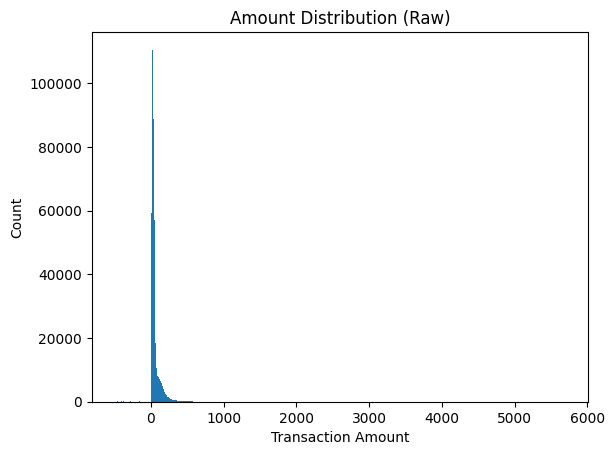

In [22]:
plt.figure()
plt.hist(df["amount"], bins=1000)
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.title("Amount Distribution (Raw)")
plt.show()

/home/nakyung/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


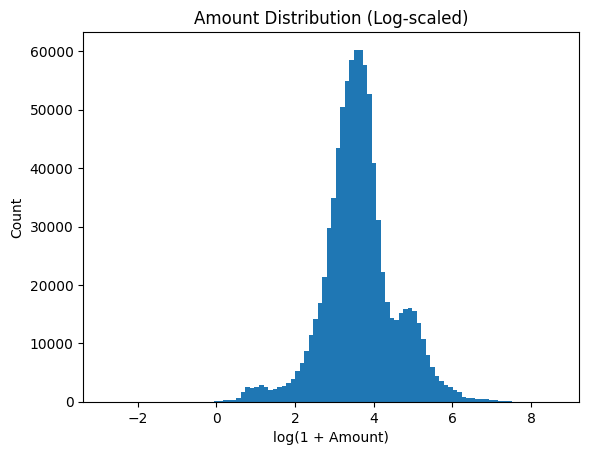

In [23]:
import numpy as np

plt.figure()
plt.hist(np.log1p(df["amount"]), bins=100)
plt.xlabel("log(1 + Amount)")
plt.ylabel("Count")
plt.title("Amount Distribution (Log-scaled)")
plt.show()


In [24]:
df["log_amount"] = np.log1p(df["amount"])

In [25]:
data = df.copy()
data.drop("amount", axis=1, inplace=True)

/home/nakyung/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


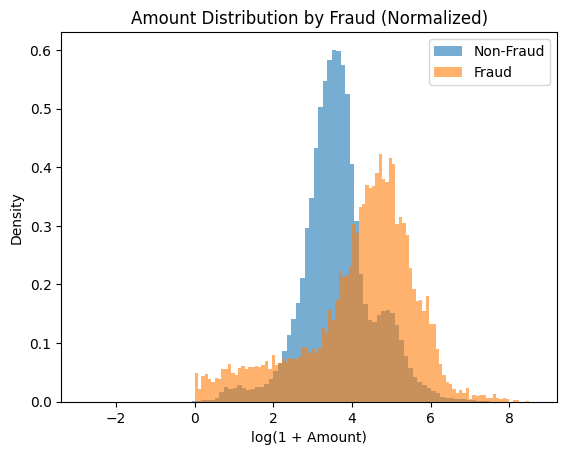

In [26]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["amount"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["amount"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + Amount)")
plt.ylabel("Density")
plt.title("Amount Distribution by Fraud (Normalized)")
plt.show()


/home/nakyung/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


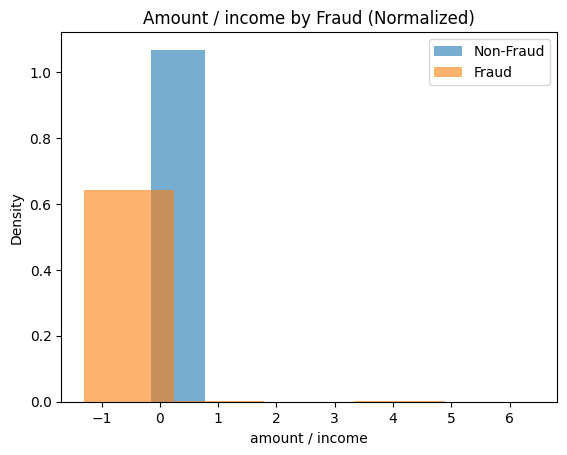

In [27]:
# amount / income
df2 = df.copy()
df2["am/in"] = df["amount"]/df["yearly_income"]

plt.figure()

plt.hist(np.log1p(df2[df2["fraud"]==0]["am/in"]),
         bins=5, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df2[df2["fraud"]==1]["am/in"]),
         bins=5, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("amount / income")
plt.ylabel("Density")
plt.title("Amount / income by Fraud (Normalized)")
plt.show()

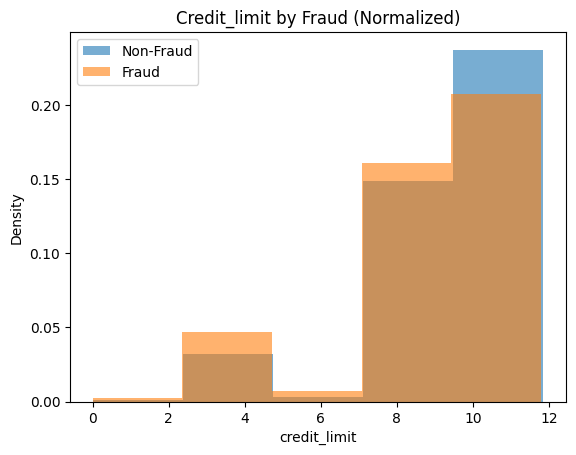

In [28]:
# amount / credit_limit
df2 = df.copy()
df2["am/in"] = df["amount"]/df["credit_limit"]

plt.figure()

plt.hist(np.log1p(df2[df2["fraud"]==0]["credit_limit"]),
         bins=5, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df2[df2["fraud"]==1]["credit_limit"]),
         bins=5, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("credit_limit")
plt.ylabel("Density")
plt.title("Credit_limit by Fraud (Normalized)")
plt.show()

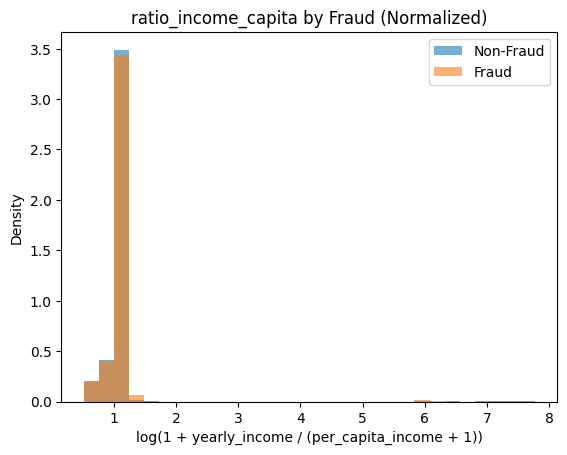

In [29]:
df2 = df.copy()

df2["ratio_income_capita"] = df2["yearly_income"] / (df2["per_capita_income"] + 1)

x0 = np.log1p(df2.loc[df2["fraud"] == 0, "ratio_income_capita"])
x1 = np.log1p(df2.loc[df2["fraud"] == 1, "ratio_income_capita"])

x0 = x0.replace([np.inf, -np.inf], np.nan).dropna()
x1 = x1.replace([np.inf, -np.inf], np.nan).dropna()

plt.figure()
plt.hist(x0, bins=30, density=True, alpha=0.6, label="Non-Fraud")
plt.hist(x1, bins=30, density=True, alpha=0.6, label="Fraud")
plt.legend()
plt.xlabel("log(1 + yearly_income / (per_capita_income + 1))")
plt.ylabel("Density")
plt.title("ratio_income_capita by Fraud (Normalized)")
plt.show()


### 분포 차이 검정

KS test

In [30]:
from scipy.stats import ks_2samp

x_nf = df.loc[df["fraud"]==0, "log_amount"]
x_f  = df.loc[df["fraud"]==1, "log_amount"]

ks_stat, p_value = ks_2samp(x_nf, x_f)

print("KS statistic:", ks_stat)
print("p-value:", p_value)

KS statistic: nan
p-value: nan


Cohen's d

In [31]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2)
    )
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(x_f, x_nf)
print("Cohen's d:", d)

Cohen's d: 0.6241223


logistic regreesion

In [32]:
X = df[["log_amount"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

MissingDataError: exog contains inf or nans

In [33]:
print("Odds Ratio:", np.exp(model.params))

NameError: name 'model' is not defined

bin 기반 Fraud Rate + Lift

In [34]:
df["amount_bin"] = pd.qcut(df["log_amount"], 10)

fraud_rate = df.groupby("amount_bin")["fraud"].mean()
overall_rate = df["fraud"].mean()

lift = fraud_rate / overall_rate

print(lift)

amount_bin
(-2.814, 2.638]    1.432145
(2.638, 3.015]     0.310983
(3.015, 3.237]     0.188128
(3.237, 3.421]     0.216170
(3.421, 3.589]     0.245209
(3.589, 3.758]     0.325878
(3.758, 3.943]     0.389304
(3.943, 4.244]     0.838026
(4.244, 4.887]     2.308883
(4.887, 8.648]     3.328195
Name: fraud, dtype: float64


/tmp/ipykernel_4029588/542384898.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("amount_bin")["fraud"].mean()


Mann-Whitney U test

In [35]:

stat, p = mannwhitneyu(x_nf, x_f, alternative='two-sided')
print("U test p-value:", p)

U test p-value: nan


In [36]:
evaluate_numeric_feature(df, "amount")

NameError: name 'evaluate_numeric_feature' is not defined

In [37]:
evaluate_numeric_feature(df, "log_amount")

NameError: name 'evaluate_numeric_feature' is not defined

**(A) 통계/효과크기/단변량 성능**

evaluate_numeric_feature(df, "amount") 출력:

- Cohen’s d: 0.947657 ← 효과크기 큼(분리가 실제로 큼)

- PR_AUC(feature only): 0.030674

    - baseline 0.0094 대비 약 3.3배

- KS/MW p-value는 0에 수렴

**(B) log_amount 10분위 Lift**

log_amount를 10분위로 나눠 lift를 찍었을 때:

최상위 bin lift: 3.47

그 다음: 2.41

흥미롭게도 최하위 bin도 1.49

결론: “큰 금액만 위험”이 아니라, 아주 작은 금액(테스트/탐색성 결제)도 fraud가 섞이는 패턴이 있는 듯.

---

# current age

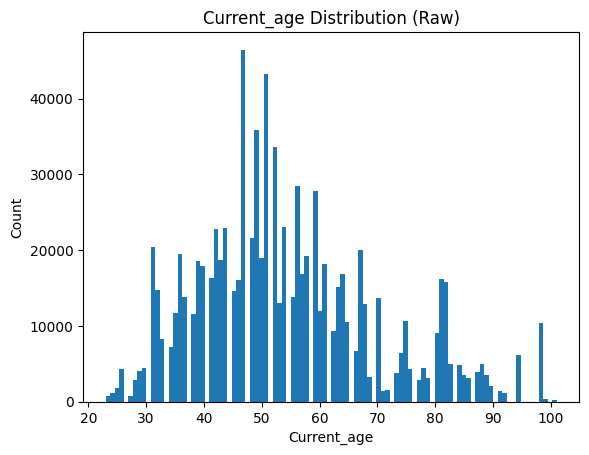

In [38]:
plt.figure()
plt.hist(df["current_age"], bins=100)
plt.xlabel("Current_age")
plt.ylabel("Count")
plt.title("Current_age Distribution (Raw)")
plt.show()

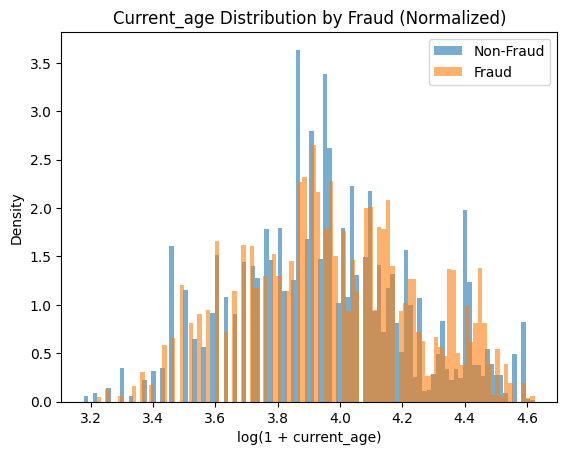

In [39]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["current_age"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["current_age"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + current_age)")
plt.ylabel("Density")
plt.title("Current_age Distribution by Fraud (Normalized)")
plt.show()


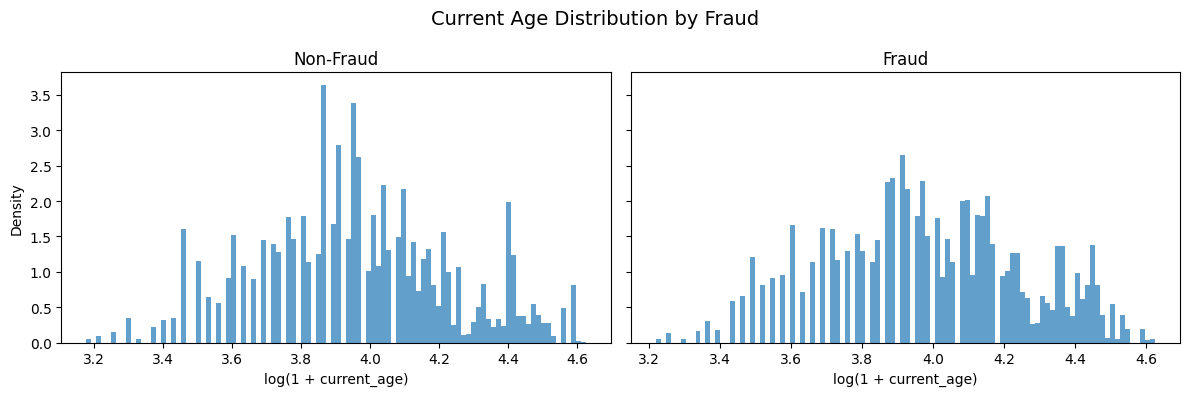

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Non-Fraud
ax1.hist(
    np.log1p(df.loc[df["fraud"] == 0, "current_age"]),
    bins=100, density=True, alpha=0.7
)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + current_age)")
ax1.set_ylabel("Density")

# Fraud
ax2.hist(
    np.log1p(df.loc[df["fraud"] == 1, "current_age"]),
    bins=100, density=True, alpha=0.7
)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + current_age)")

plt.suptitle("Current Age Distribution by Fraud", fontsize=14)
plt.tight_layout()
plt.show()


KS Test

In [41]:
from scipy.stats import ks_2samp

x_nf = df.loc[df["fraud"] == 0, "current_age"]
x_f  = df.loc[df["fraud"] == 1, "current_age"]

ks_stat, p_value = ks_2samp(x_nf, x_f)

print("KS statistic:", ks_stat)
print("p-value:", p_value)

KS statistic: 0.06909665908274842
p-value: 3.490467807427968e-36


Cohen’s d

In [42]:
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(
        ((nx-1)*x.std()**2 + (ny-1)*y.std()**2) / (nx+ny-2)
    )
    return (x.mean() - y.mean()) / pooled_std

d = cohens_d(x_f, x_nf)
print("Cohen's d:", d)

Cohen's d: 0.08556292561522987


단변량 로지스틱 회귀

In [43]:
X = df[["current_age"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.055091
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               886255
Model:                          Logit   Df Residuals:                   886253
Method:                           MLE   Df Model:                            1
Date:                Sat, 07 Feb 2026   Pseudo R-squ.:               0.0006336
Time:                        15:12:24   Log-Likelihood:                -48825.
converged:                       True   LL-Null:                       -48856.
Covariance Type:            nonrobust   LLR p-value:                 3.601e-15
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.9088      0.039   -125.703      0.000      -4.985      -4.832
current_age     0.0054    

In [44]:
print("Odds Ratio:", np.exp(model.params))

Odds Ratio: const          0.007381
current_age    1.005366
dtype: float64


PR-AUC (단독 예측력)

In [45]:
from sklearn.metrics import average_precision_score

score = average_precision_score(df["fraud"], df["current_age"])
print("PR-AUC (age only):", score)

PR-AUC (age only): 0.010568669815459484


Bin 기반 Fraud Rate

/tmp/ipykernel_4029588/2671232821.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby("age_bin")["fraud"].mean()


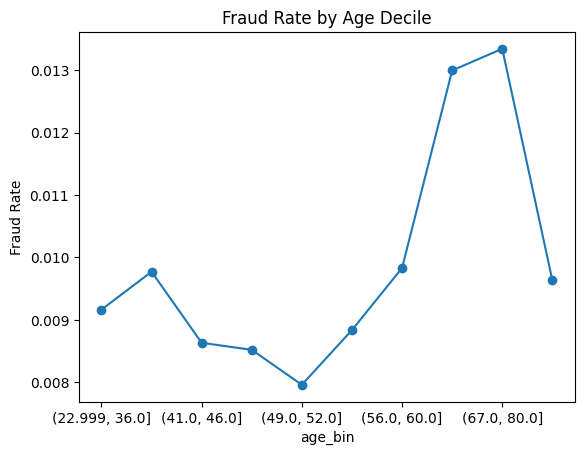

In [46]:
df["age_bin"] = pd.qcut(df["current_age"], 10)

fraud_rate = df.groupby("age_bin")["fraud"].mean()
fraud_rate.plot(marker="o")
plt.title("Fraud Rate by Age Decile")
plt.ylabel("Fraud Rate")
plt.show()

In [57]:
evaluate_numeric_feature_safe(df, "current_age")

KS_p          3.490468e-36
MW_p          2.617730e-20
Cohen_d       8.556293e-02
Odds_Ratio    1.005366e+00
Logit_p       2.100320e-15
PR_AUC        1.056867e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# retirement age

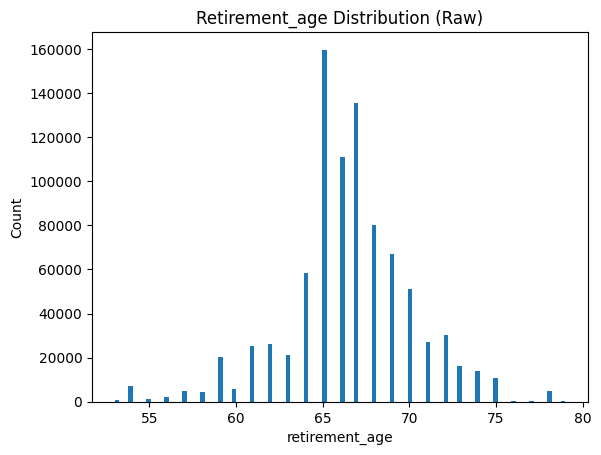

In [58]:
plt.figure()
plt.hist(df["retirement_age"], bins=100)
plt.xlabel("retirement_age")
plt.ylabel("Count")
plt.title("Retirement_age Distribution (Raw)")
plt.show()

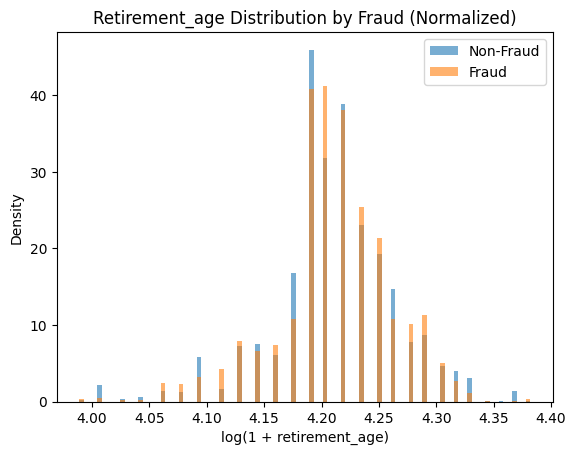

In [59]:
plt.figure()

plt.hist(np.log1p(df[df["fraud"]==0]["retirement_age"]),
         bins=100, density=True, alpha=0.6, label="Non-Fraud")

plt.hist(np.log1p(df[df["fraud"]==1]["retirement_age"]),
         bins=100, density=True, alpha=0.6, label="Fraud")

plt.legend()
plt.xlabel("log(1 + retirement_age)")
plt.ylabel("Density")
plt.title("Retirement_age Distribution by Fraud (Normalized)")
plt.show()

KS test (분포 차이)

In [61]:

evaluate_numeric_feature_safe(df, "retirement_age")


KS_p          2.665915e-12
MW_p          1.337785e-02
Cohen_d       6.579598e-03
Odds_Ratio    1.001806e+00
Logit_p       5.415444e-01
PR_AUC        9.802147e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# latitude & longitude 

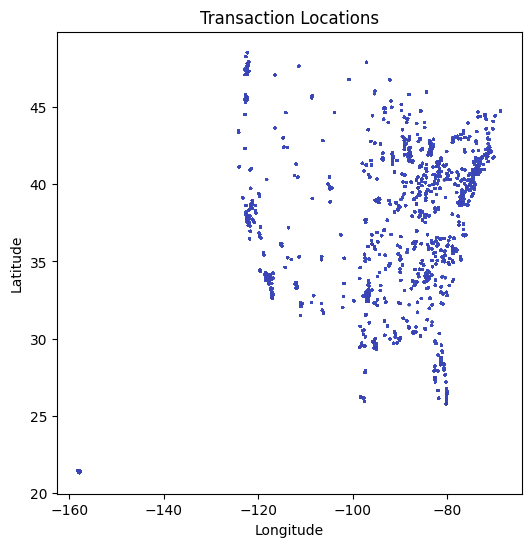

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(df["longitude"], df["latitude"],
            s=1, alpha=0.1,
            c=df["fraud"], cmap="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Transaction Locations")
plt.show()

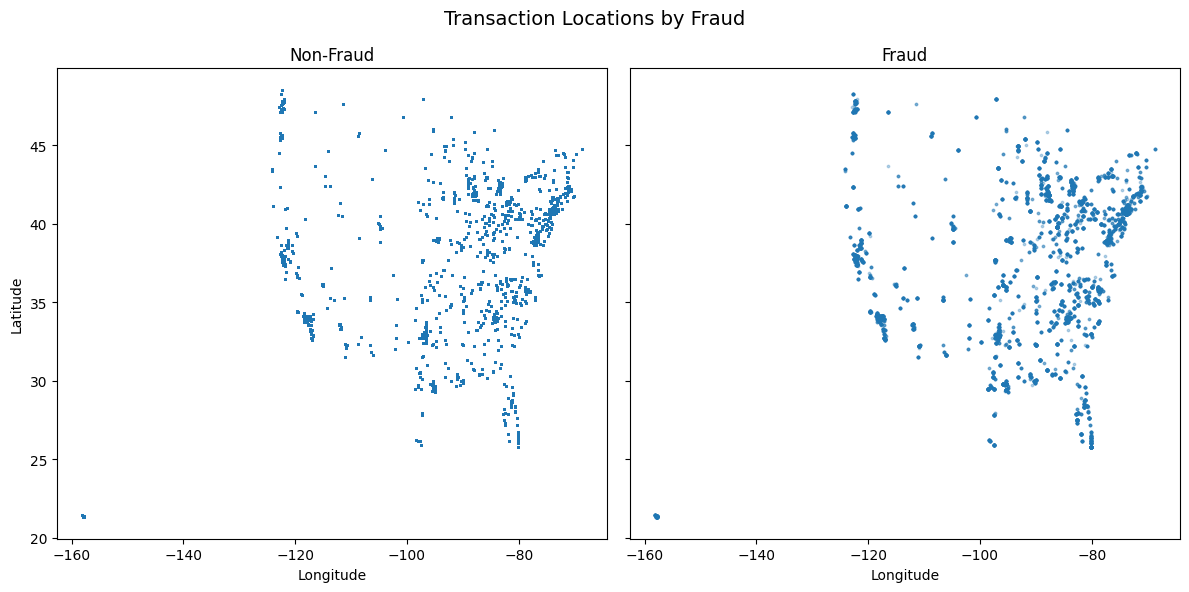

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Non-Fraud
df_nf = df[df["fraud"] == 0]
ax1.scatter(df_nf["longitude"], df_nf["latitude"],
            s=1, alpha=0.1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")

# Fraud
df_f = df[df["fraud"] == 1]
ax2.scatter(df_f["longitude"], df_f["latitude"],
            s=3, alpha=0.3)  
ax2.set_title("Fraud")
ax2.set_xlabel("Longitude")

plt.suptitle("Transaction Locations by Fraud", fontsize=14)
plt.tight_layout()
plt.show()


In [64]:
evaluate_numeric_feature_safe(df, "latitude")

KS_p          8.197283e-13
MW_p          3.609309e-07
Cohen_d       4.658683e-02
Odds_Ratio    1.009151e+00
Logit_p       1.546644e-05
PR_AUC        1.042824e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [65]:
evaluate_numeric_feature_safe(df, "longitude")

KS_p          3.585701e-64
MW_p          5.760892e-37
Cohen_d      -9.851675e-02
Odds_Ratio    9.942938e-01
Logit_p       6.811002e-20
PR_AUC        8.657356e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# total_debt

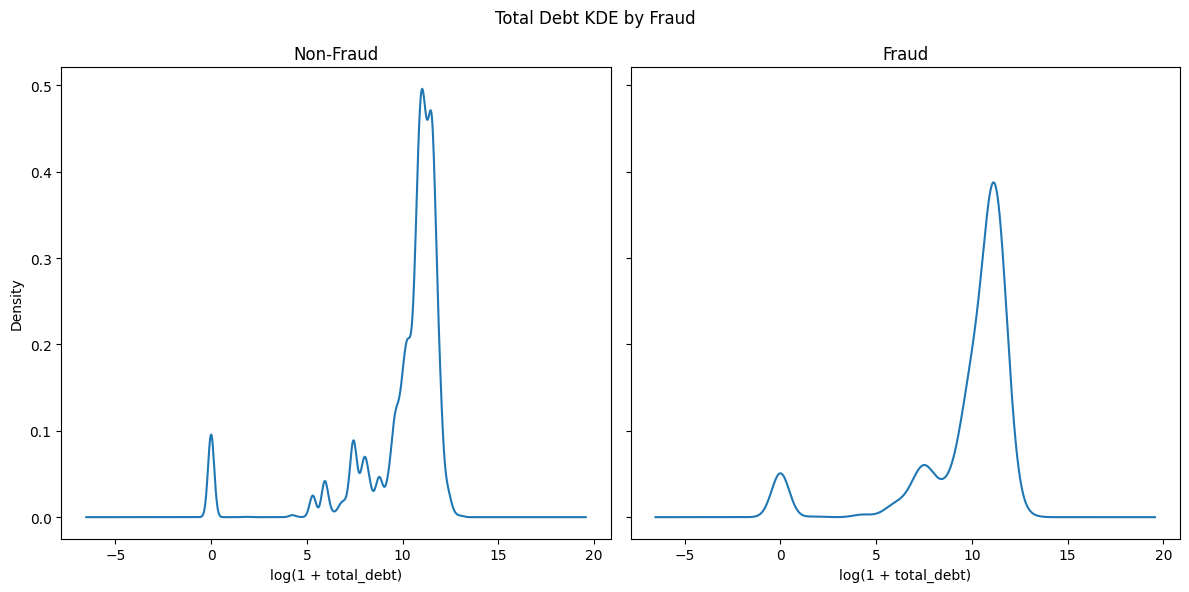

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["total_debt"].pipe(np.log1p).plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + total_debt)")

df_f["total_debt"].pipe(np.log1p).plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + total_debt)")

plt.suptitle("Total Debt KDE by Fraud")
plt.tight_layout()
plt.show()

In [67]:
evaluate_numeric_feature_safe(df, "total_debt")

KS_p          1.961864e-28
MW_p          4.448692e-28
Cohen_d      -1.120022e-01
Odds_Ratio    9.999976e-01
Logit_p       2.391587e-25
PR_AUC        8.848571e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [68]:
df2["total_debt"] = np.log1p(df["total_debt"])
evaluate_numeric_feature_safe(df2, "total_debt")

KS_p          1.961864e-28
MW_p          4.448692e-28
Cohen_d      -1.156406e-01
Odds_Ratio    9.602314e-01
Logit_p       1.074360e-26
PR_AUC        8.848571e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# credit_score

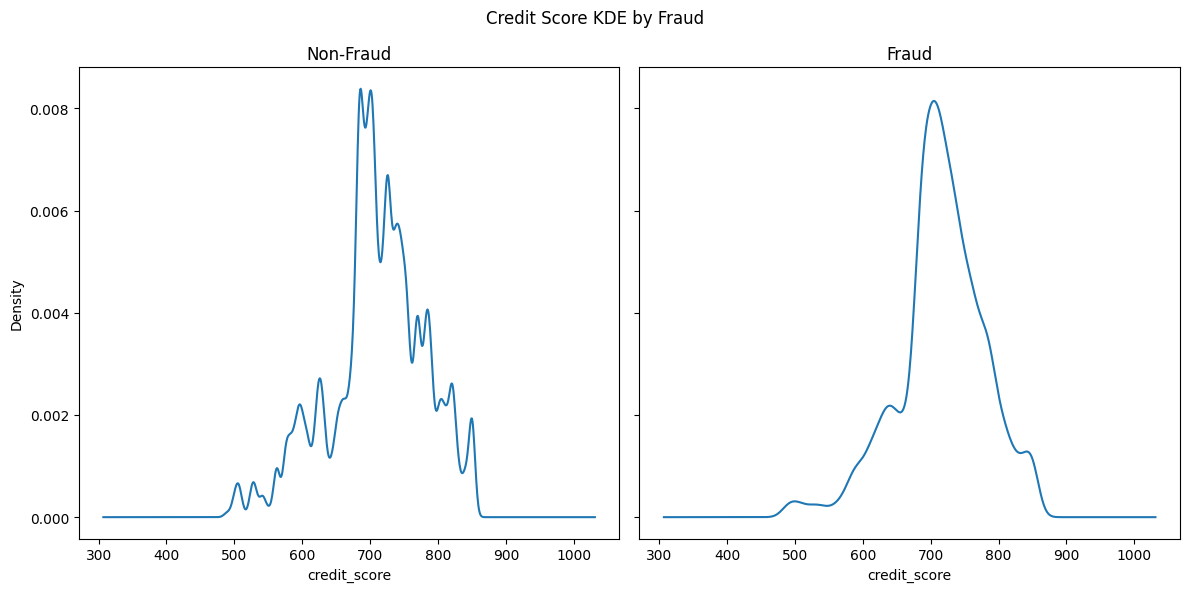

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["credit_score"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("credit_score")

df_f["credit_score"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("credit_score")

plt.suptitle("Credit Score KDE by Fraud")
plt.tight_layout()
plt.show()

In [70]:
evaluate_numeric_feature_safe(df, "credit_score")

KS_p          3.143320e-31
MW_p          8.536171e-14
Cohen_d       8.400960e-02
Odds_Ratio    1.001203e+00
Logit_p       6.507200e-15
PR_AUC        1.003062e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# num_credit_cards

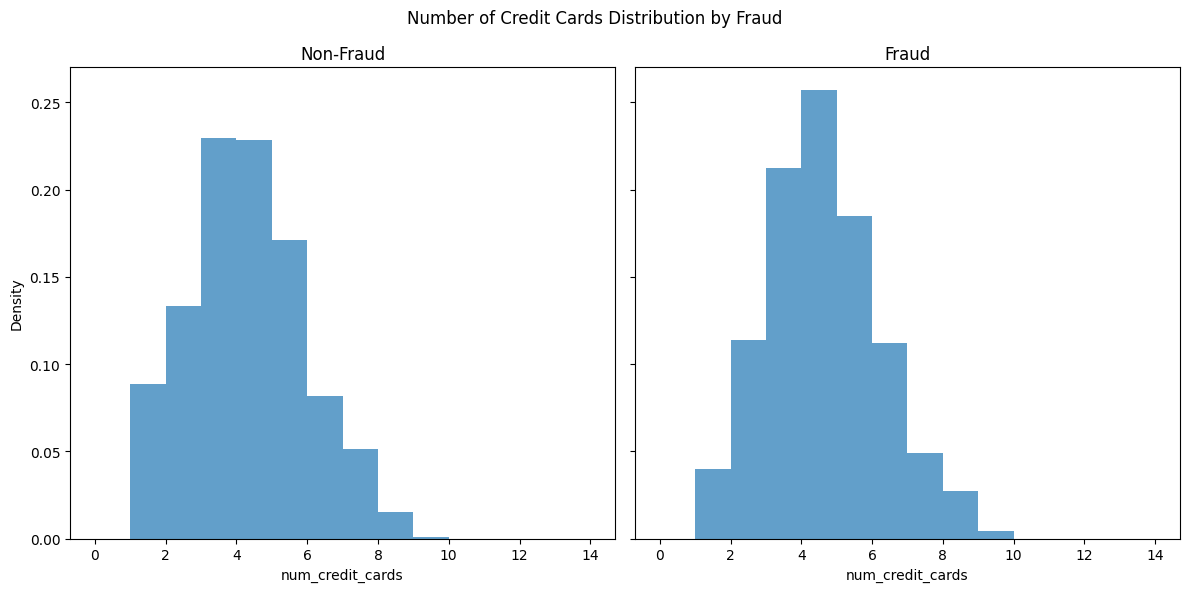

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.hist(df_nf["num_credit_cards"], bins=range(0, 15),
         density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_credit_cards")
ax1.set_ylabel("Density")

ax2.hist(df_f["num_credit_cards"], bins=range(0, 15),
         density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("num_credit_cards")

plt.suptitle("Number of Credit Cards Distribution by Fraud")
plt.tight_layout()
plt.show()


In [72]:
evaluate_numeric_feature_safe(df, "num_credit_cards")

KS_p          6.058388e-55
MW_p          2.498930e-73
Cohen_d       2.012201e-01
Odds_Ratio    1.125829e+00
Logit_p       1.676328e-77
PR_AUC        1.155266e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

In [73]:
df_nf = df[df["fraud"]==0].copy()
df_f = df[df["fraud"]==1].copy()

# num_cards_issued

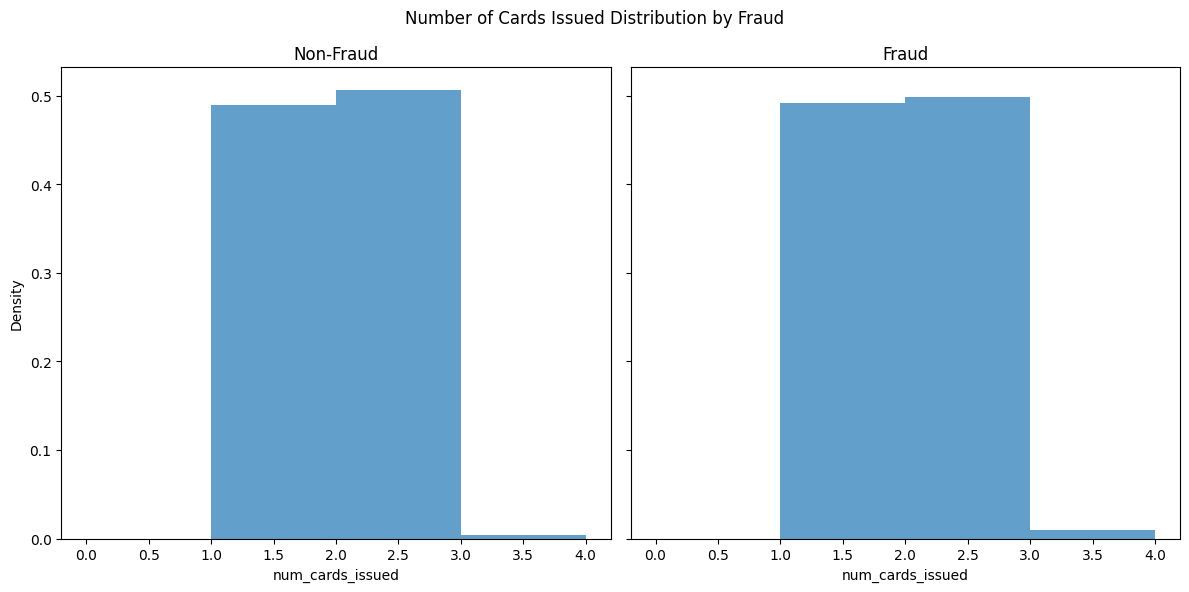

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Non-Fraud
ax1.hist(df_nf["num_cards_issued"],
         bins=range(0, df["num_cards_issued"].max() + 2),
         density=True,
         alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_cards_issued")
ax1.set_ylabel("Density")

# Fraud
ax2.hist(df_f["num_cards_issued"],
         bins=range(0, df["num_cards_issued"].max() + 2),
         density=True,
         alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("num_cards_issued")

plt.suptitle("Number of Cards Issued Distribution by Fraud")
plt.tight_layout()
plt.show()

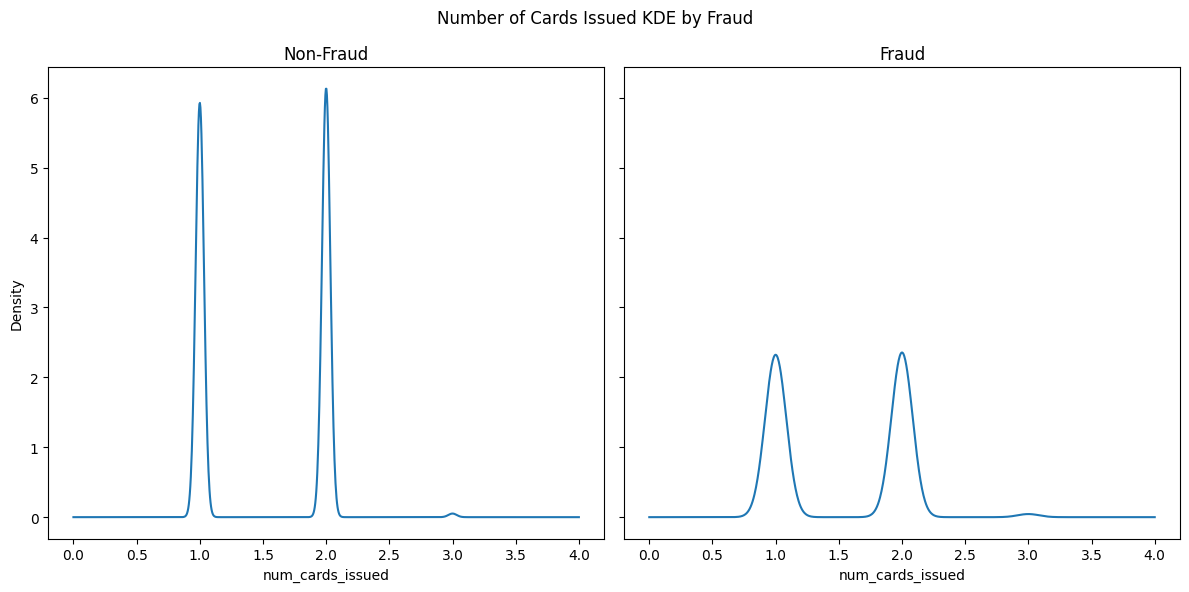

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["num_cards_issued"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("num_cards_issued")

df_f["num_cards_issued"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("num_cards_issued")

plt.suptitle("Number of Cards Issued KDE by Fraud")
plt.tight_layout()
plt.show()


In [76]:
evaluate_numeric_feature_safe(df, "num_cards_issued")

KS_p               0.974682
MW_p               0.999602
Cohen_d            0.004945
Odds_Ratio         1.009775
Logit_p            0.646341
PR_AUC             0.009894
n             886255.000000
pos_rate           0.009810
dtype: float64

---

# credit_limit

In [50]:
df["credit_limit"]

0         23401.0
1         21628.0
2         22527.0
3          7300.0
4           974.0
           ...   
178149    10764.0
178150     4900.0
178151    10374.0
178152     5933.0
178153     7500.0
Name: credit_limit, Length: 886255, dtype: float32

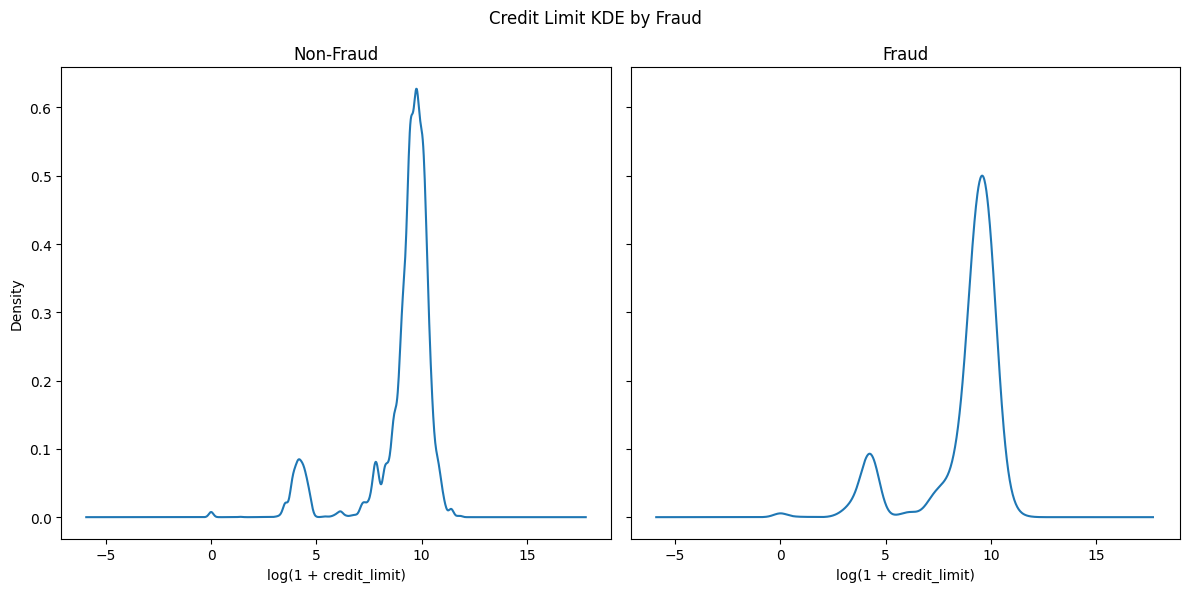

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["credit_limit"].pipe(np.log1p).plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + credit_limit)")

df_f["credit_limit"].pipe(np.log1p).plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + credit_limit)")

plt.suptitle("Credit Limit KDE by Fraud")
plt.tight_layout()
plt.show()

In [78]:
evaluate_numeric_feature_safe(df, "credit_limit")

KS_p          2.474469e-112
MW_p          9.560910e-115
Cohen_d       -2.155366e-01
Odds_Ratio     9.999785e-01
Logit_p        2.335543e-91
PR_AUC         8.124023e-03
n              8.862550e+05
pos_rate       9.809818e-03
dtype: float64

---

# year_pin_last_changed

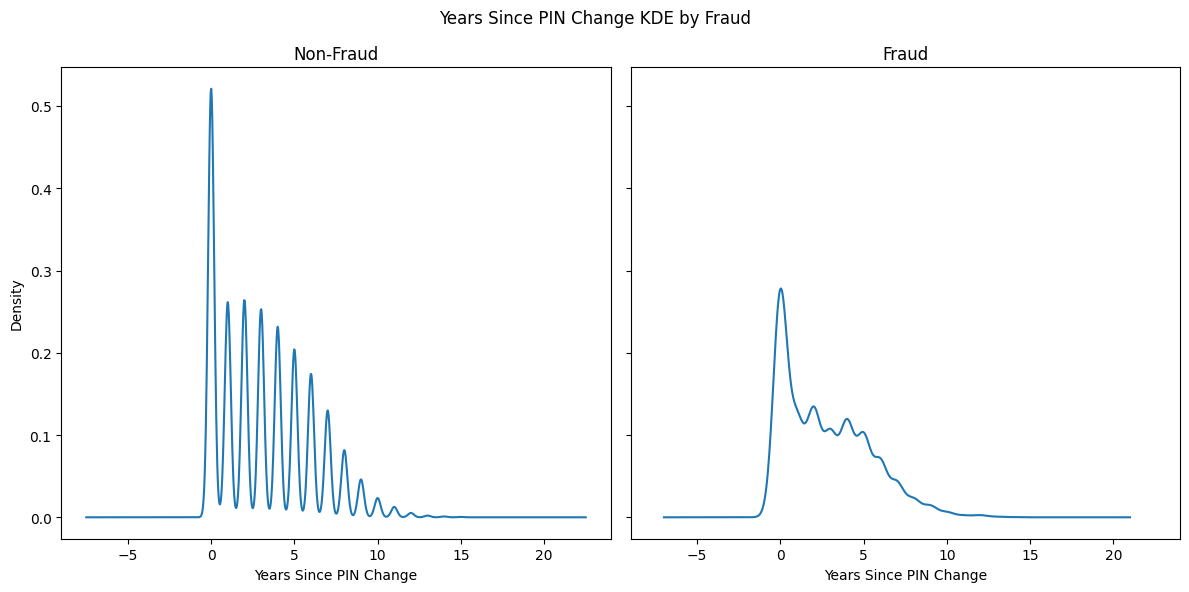

/tmp/ipykernel_4029588/2743522520.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df2.groupby(bins)["fraud"].mean()


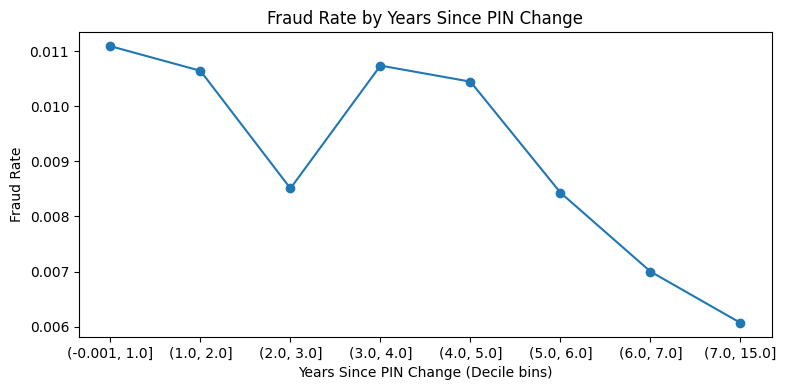

In [146]:

required = ["tx_year", "year_pin_last_changed", "fraud"]
missing = [c for c in required if c not in df2.columns]
if missing:
    raise KeyError(f"Missing columns: {missing}")

df2["years_since_pin_change"] = df2["tx_year"] - df2["year_pin_last_changed"]

df2["years_since_pin_change"] = (
    df2["years_since_pin_change"]
      .replace([np.inf, -np.inf], np.nan)
)

df2.loc[df2["years_since_pin_change"] < 0, "years_since_pin_change"] = 0

df2 = df2.dropna(subset=["years_since_pin_change", "fraud"])


df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["years_since_pin_change"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Years Since PIN Change")
ax1.set_ylabel("Density")

df_f["years_since_pin_change"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Years Since PIN Change")

plt.suptitle("Years Since PIN Change KDE by Fraud")
plt.tight_layout()
plt.show()


bins = pd.qcut(df2["years_since_pin_change"], 10, duplicates="drop")
fraud_rate = df2.groupby(bins)["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.xlabel("Years Since PIN Change (Decile bins)")
plt.title("Fraud Rate by Years Since PIN Change")
plt.tight_layout()
plt.show()


In [147]:
evaluate_numeric_feature_safe(df2, "years_since_pin_change")

KS_p          1.117473e-25
MW_p          5.042063e-41
Cohen_d      -1.487118e-01
Odds_Ratio    9.450539e-01
Logit_p       3.810706e-43
PR_AUC        8.774105e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [79]:
evaluate_numeric_feature_safe(df, "year_pin_last_changed")

KS_p               0.000478
MW_p               0.000498
Cohen_d           -0.037061
Odds_Ratio         0.986327
Logit_p            0.000584
PR_AUC             0.009715
n             886255.000000
pos_rate           0.009810
dtype: float64

---

# has_error
- err_bad_card_number
- err_bad_expiration
- err_bad_cvv
- err_bad_pin
- err_bad_zipcode
- err_insufficient_balance
- err_technical_glitch

                          Non-Fraud Rate  Fraud Rate
err_bad_card_number             0.005101    0.006901
err_bad_expiration              0.003988    0.006211
err_bad_cvv                     0.003890    0.016218
err_bad_pin                     0.000000    0.000000
err_bad_zipcode                 0.000000    0.000000
err_insufficient_balance        0.007831    0.013803
err_technical_glitch            0.002045    0.002185


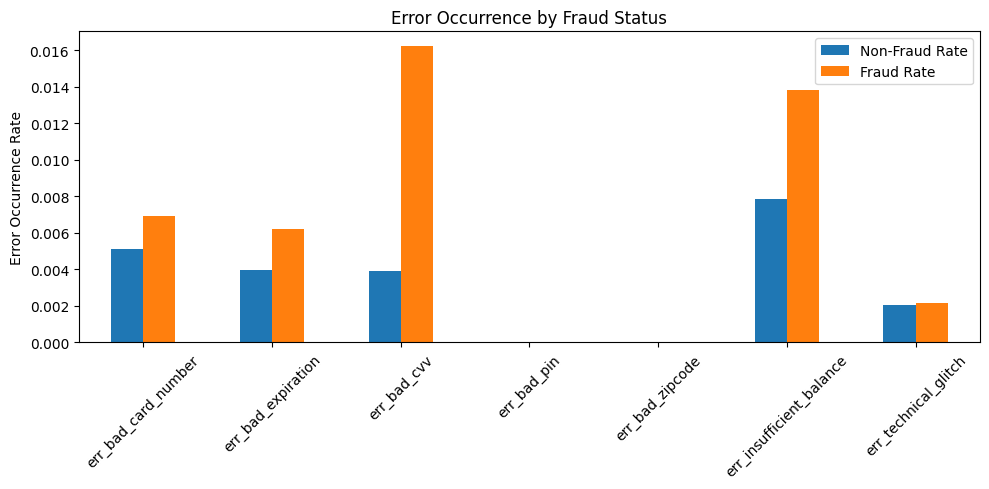

In [80]:
error_cols = [
    "err_bad_card_number",
    "err_bad_expiration",
    "err_bad_cvv",
    "err_bad_pin",
    "err_bad_zipcode",
    "err_insufficient_balance",
    "err_technical_glitch",
]

df2 = df.copy()

# Fraud / Non-Fraud 분리
df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

nf_error_rate = df_nf[error_cols].mean()
f_error_rate  = df_f[error_cols].mean()

error_compare = pd.DataFrame({
    "Non-Fraud Rate": nf_error_rate,
    "Fraud Rate": f_error_rate
})

print(error_compare)

error_compare.plot(kind="bar", figsize=(10,5))
plt.ylabel("Error Occurrence Rate")
plt.title("Error Occurrence by Fraud Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


err_bad_cvv                 0.039662
err_insufficient_balance    0.017162
err_bad_expiration          0.015194
err_bad_card_number         0.013228
err_technical_glitch        0.010474
err_bad_pin                      NaN
err_bad_zipcode                  NaN
dtype: float64


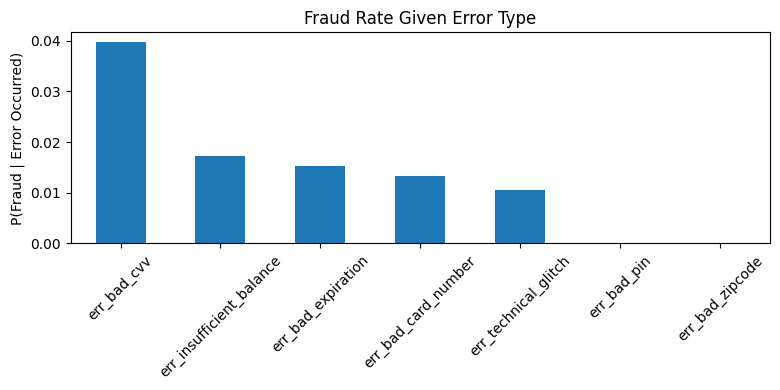

In [81]:
fraud_rate_by_error = {}

for col in error_cols:
    fraud_rate_by_error[col] = df2[df2[col] == 1]["fraud"].mean()

fraud_rate_by_error = pd.Series(fraud_rate_by_error).sort_values(ascending=False)

print(fraud_rate_by_error)

fraud_rate_by_error.plot(kind="bar", figsize=(8,4))
plt.ylabel("P(Fraud | Error Occurred)")
plt.title("Fraud Rate Given Error Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [82]:
df.drop(columns=["err_bad_pin","err_bad_zipcode"], inplace=True)

-> cvv error가 핵심

In [83]:
results = {}

for col in error_cols:
    if col not in df.columns:
        print(f"[SKIP] not in df.columns: {col}")
        continue
    print(f"Evaluating: {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

mccg_results = pd.DataFrame(results).T.sort_values("PR_AUC", ascending=False)
mccg_results


Evaluating: err_bad_card_number
Evaluating: err_bad_expiration
Evaluating: err_bad_cvv
[SKIP] not in df.columns: err_bad_pin
[SKIP] not in df.columns: err_bad_zipcode
Evaluating: err_insufficient_balance
Evaluating: err_technical_glitch


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
err_bad_cvv,0.144836,3.420032e-73,0.195072,4.221061,4.580620e-62,0.010294,886255.0,0.00981
err_insufficient_balance,0.916793,3.779088e-10,0.067502,1.773281,6.483088e-10,0.009911,886255.0,0.00981
err_bad_expiration,1.000000,1.100766e-03,0.035173,1.560823,1.209446e-03,0.009843,886255.0,0.00981
err_bad_card_number,1.000000,1.920645e-02,0.025236,1.355519,1.967412e-02,0.009833,886255.0,0.00981
err_technical_glitch,1.000000,7.738401e-01,0.003097,1.068582,7.738801e-01,0.009811,886255.0,0.00981


---

# acct
- acct_open_year
- acct_open_month

In [84]:
df2 = df.copy()

# 거래 기준 총 개월 수
tx_total_month = df2["tx_year"] * 12 + df2["tx_month"]
open_total_month = df2["acct_open_year"] * 12 + df2["acct_open_month"]

df2["account_age_months"] = tx_total_month - open_total_month

# 음수 처리 (데이터 오류 방지)
df2.loc[df2["account_age_months"] < 0, "account_age_months"] = 0

df2 = df2.dropna(subset=["account_age_months", "fraud"])


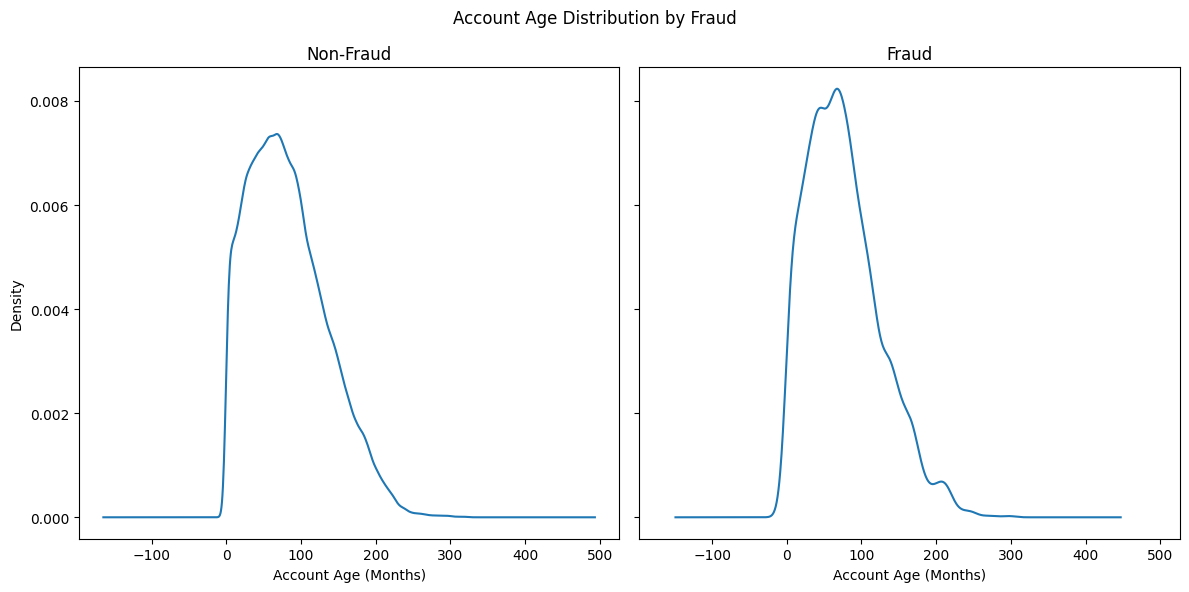

In [85]:
df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["account_age_months"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Account Age (Months)")
ax1.set_ylabel("Density")

df_f["account_age_months"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Account Age (Months)")

plt.suptitle("Account Age Distribution by Fraud")
plt.tight_layout()
plt.show()


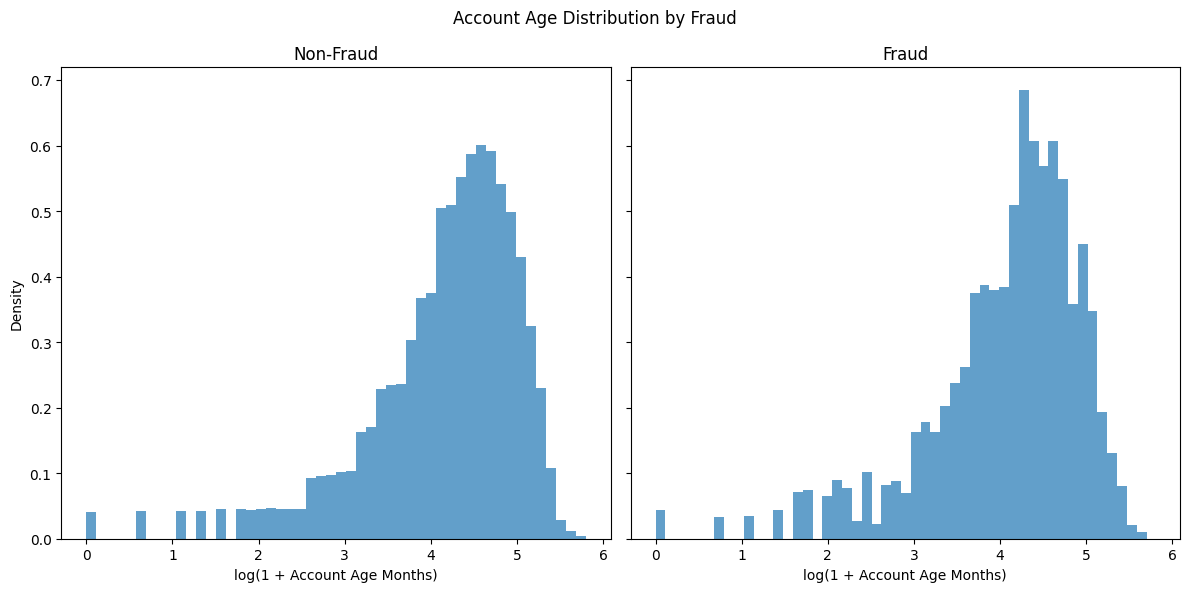

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax1.hist(np.log1p(df_nf["account_age_months"]),
         bins=50, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("log(1 + Account Age Months)")
ax1.set_ylabel("Density")

ax2.hist(np.log1p(df_f["account_age_months"]),
         bins=50, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("log(1 + Account Age Months)")

plt.suptitle("Account Age Distribution by Fraud")
plt.tight_layout()
plt.show()


/tmp/ipykernel_4029588/2884826611.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df2.groupby(bins)["fraud"].mean()


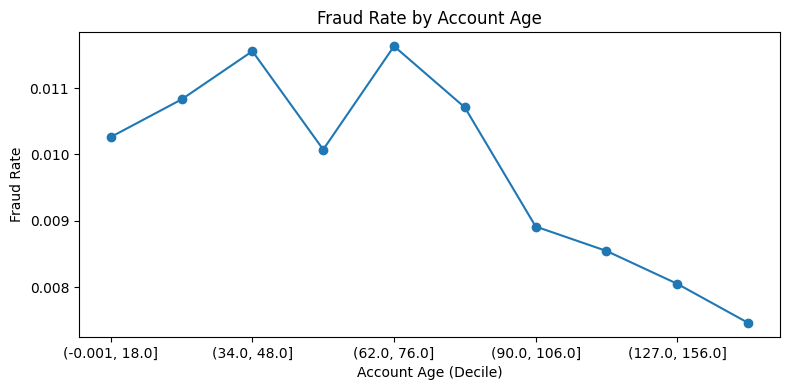

In [87]:
bins = pd.qcut(df2["account_age_months"], 10, duplicates="drop")
fraud_rate = df2.groupby(bins)["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.xlabel("Account Age (Decile)")
plt.title("Fraud Rate by Account Age")
plt.tight_layout()
plt.show()


In [88]:
evaluate_numeric_feature_safe(df2, "acct_open_month")

KS_p               0.001917
MW_p               0.004488
Cohen_d           -0.031007
Odds_Ratio         0.990871
Logit_p            0.004019
PR_AUC             0.009620
n             886255.000000
pos_rate           0.009810
dtype: float64

In [90]:
df2["is_new_1m"] = (df2["account_age_months"] <= 1).astype(int)
df2["is_new_3m"] = (df2["account_age_months"] <= 3).astype(int)
df2["is_new_6m"] = (df2["account_age_months"] <= 6).astype(int)

In [91]:
for col in ["is_new_1m", "is_new_3m", "is_new_6m"]:
    print("\n", col)
    print(df2.groupby(col)["fraud"].mean())
    print(df2[col].value_counts())


 is_new_1m
is_new_1m
0    0.009817
1    0.009028
Name: fraud, dtype: float64
is_new_1m
0    877837
1      8418
Name: count, dtype: int64

 is_new_3m
is_new_3m
0    0.009825
1    0.009024
Name: fraud, dtype: float64
is_new_3m
0    869078
1     17177
Name: count, dtype: int64

 is_new_6m
is_new_6m
0    0.009741
1    0.011712
Name: fraud, dtype: float64
is_new_6m
0    855177
1     31078
Name: count, dtype: int64


In [92]:
for col in ["is_new_1m", "is_new_3m", "is_new_6m"]:
    print("\nEvaluating:", col)
    print(evaluate_numeric_feature_safe(df2, col))


Evaluating: is_new_1m
KS_p               1.000000
MW_p               0.464755
Cohen_d           -0.007879
Odds_Ratio         0.918896
Logit_p            0.464888
PR_AUC             0.009803
n             886255.000000
pos_rate           0.009810
dtype: float64

Evaluating: is_new_3m
KS_p               1.000000
MW_p               0.291123
Cohen_d           -0.011378
Odds_Ratio         0.917666
Logit_p            0.291271
PR_AUC             0.009796
n             886255.000000
pos_rate           0.009810
dtype: float64

Evaluating: is_new_6m
KS_p               0.808692
MW_p               0.000531
Cohen_d            0.037340
Odds_Ratio         1.204828
Logit_p            0.000541
PR_AUC             0.009889
n             886255.000000
pos_rate           0.009810
dtype: float64


# expiers
- expiers_year
- expiers_month
- months_to_expire

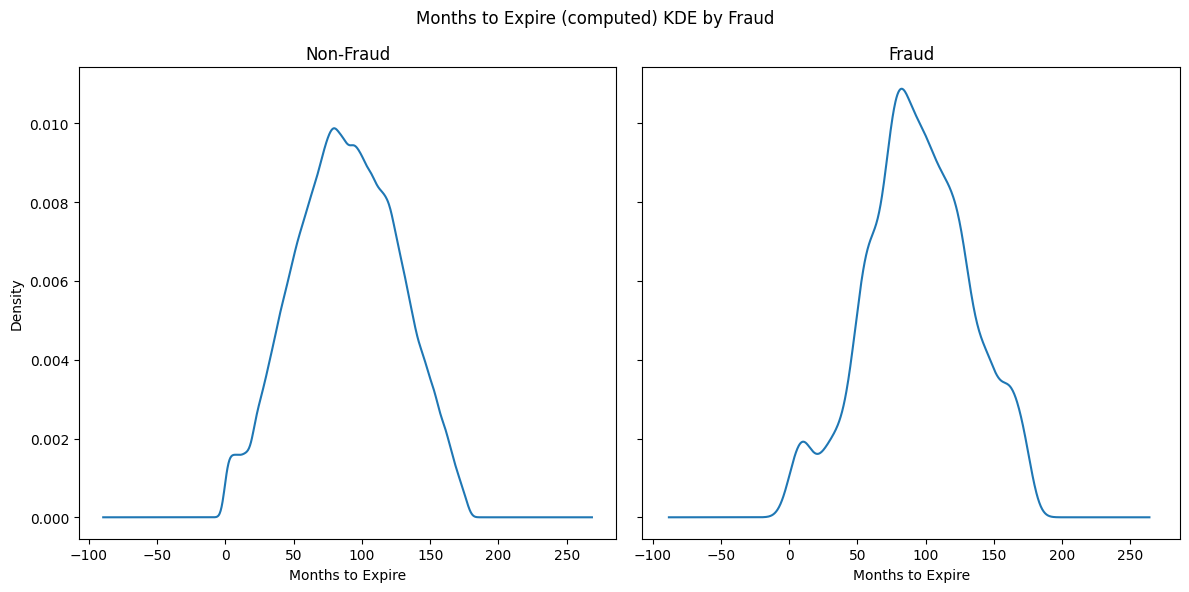

In [93]:
df2 = df.copy()

tx_total_month = df2["tx_year"] * 12 + df2["tx_month"]
expire_total_month = df2["expires_year"] * 12 + df2["expires_month"]
df2["months_to_expire_calc"] = expire_total_month - tx_total_month

df2 = df2.dropna(subset=["months_to_expire_calc", "fraud"])

df_nf = df2[df2["fraud"] == 0]
df_f  = df2[df2["fraud"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

df_nf["months_to_expire_calc"].plot.kde(ax=ax1)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Months to Expire")

df_f["months_to_expire_calc"].plot.kde(ax=ax2)
ax2.set_title("Fraud")
ax2.set_xlabel("Months to Expire")

plt.suptitle("Months to Expire (computed) KDE by Fraud")
plt.tight_layout()
plt.show()


In [94]:
evaluate_numeric_feature_safe(df2, "months_to_expire_calc")

KS_p          1.168276e-43
MW_p          5.576703e-40
Cohen_d       1.477168e-01
Odds_Ratio    1.003961e+00
Logit_p       1.183444e-42
PR_AUC        1.199145e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [143]:
evaluate_numeric_feature_safe(df2, "months_to_expire")

KS_p          1.168276e-43
MW_p          5.576703e-40
Cohen_d       1.477168e-01
Odds_Ratio    1.003961e+00
Logit_p       1.183444e-42
PR_AUC        1.199145e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# Time
- tx_year
- tx_month
- tx_day
- tx_hour

### Hour

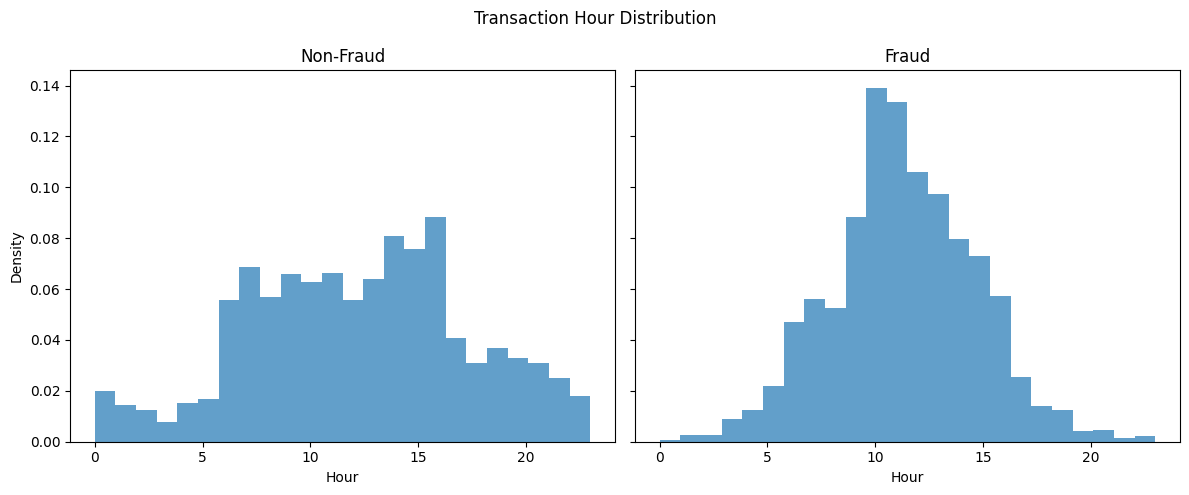

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_hour"], bins=24, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Density")

ax2.hist(df_f["tx_hour"], bins=24, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Hour")

plt.suptitle("Transaction Hour Distribution")
plt.tight_layout()
plt.show()

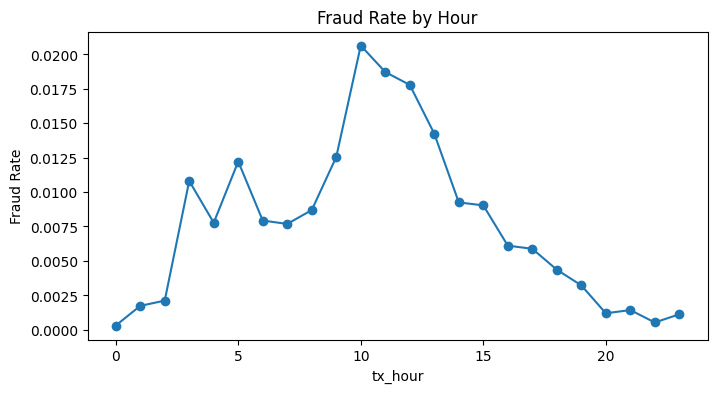

In [ ]:
fraud_rate_hour = df.groupby("tx_hour")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_hour.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Hour")
plt.show()

### day

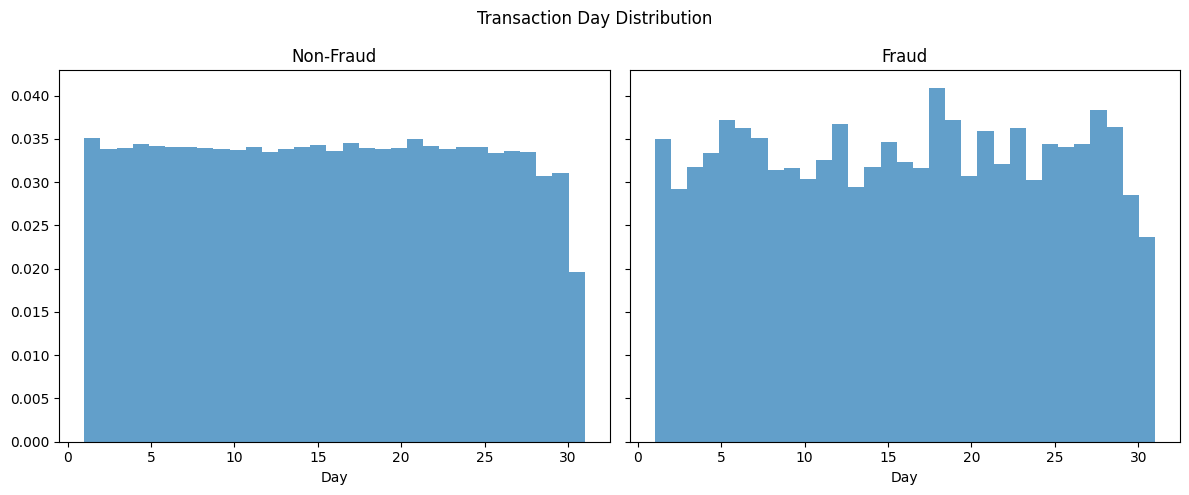

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_day"], bins=31, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Day")

ax2.hist(df_f["tx_day"], bins=31, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Day")

plt.suptitle("Transaction Day Distribution")
plt.tight_layout()
plt.show()

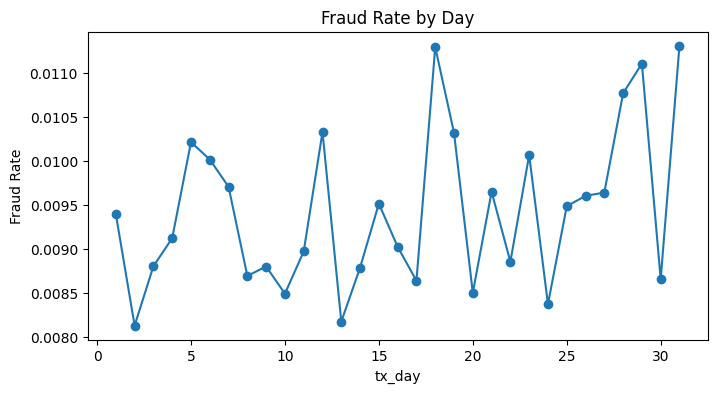

In [ ]:
fraud_rate_day = df.groupby("tx_day")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_day.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Day")
plt.show()


### month

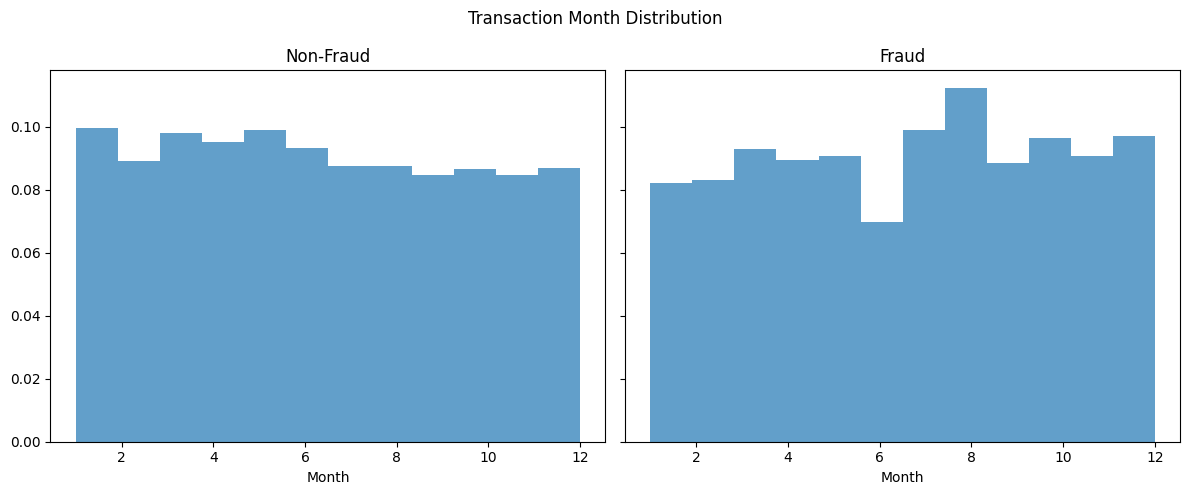

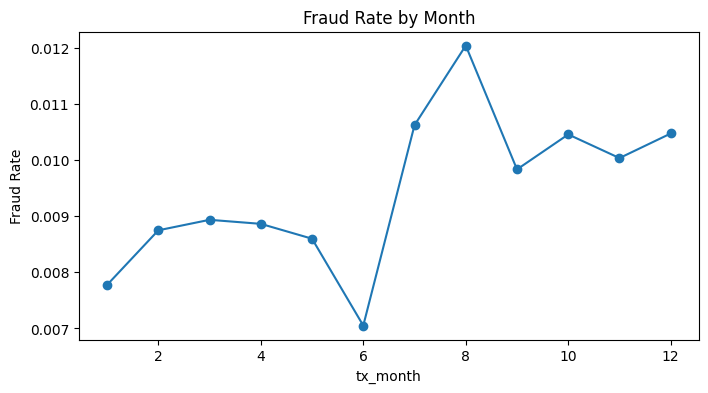

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_month"], bins=12, density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Month")

ax2.hist(df_f["tx_month"], bins=12, density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Month")

plt.suptitle("Transaction Month Distribution")
plt.tight_layout()
plt.show()

fraud_rate_month = df.groupby("tx_month")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_month.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Month")
plt.show()


### year

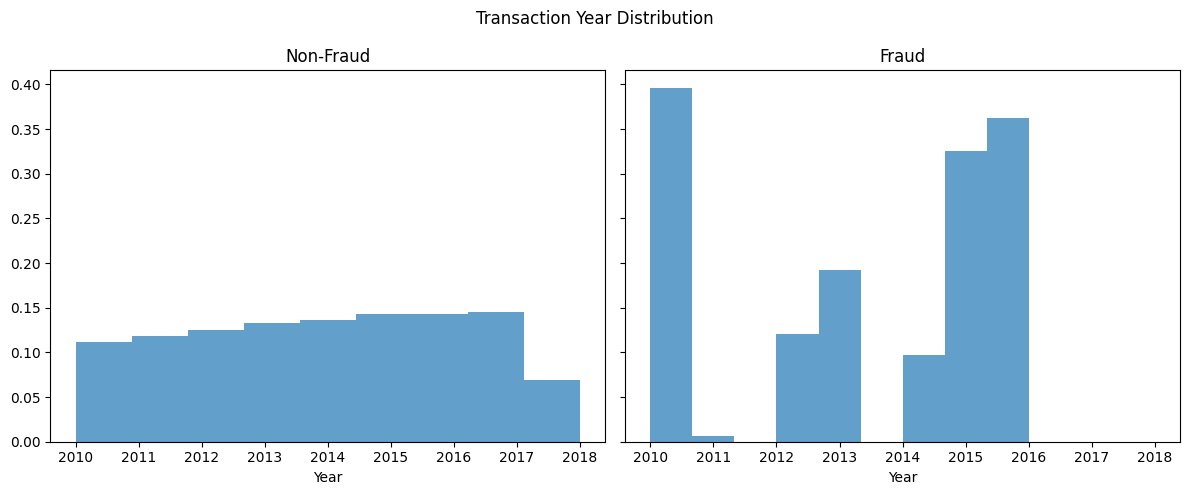

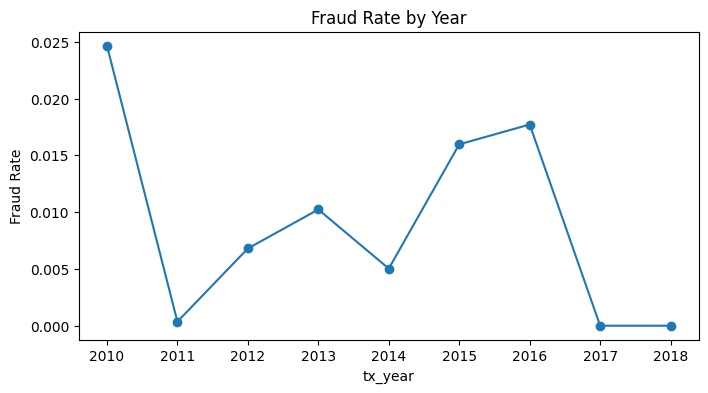

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

ax1.hist(df_nf["tx_year"], bins=len(df["tx_year"].unique()), density=True, alpha=0.7)
ax1.set_title("Non-Fraud")
ax1.set_xlabel("Year")

ax2.hist(df_f["tx_year"], bins=len(df["tx_year"].unique()), density=True, alpha=0.7)
ax2.set_title("Fraud")
ax2.set_xlabel("Year")

plt.suptitle("Transaction Year Distribution")
plt.tight_layout()
plt.show()

fraud_rate_year = df.groupby("tx_year")["fraud"].mean()

plt.figure(figsize=(8,4))
fraud_rate_year.plot(marker="o")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Year")
plt.show()


In [ ]:
evaluate_numeric_feature_safe(df, "tx_month")

KS_p          1.548762e-26
MW_p          5.645017e-17
Cohen_d       9.233662e-02
Odds_Ratio    1.027099e+00
Logit_p       6.183829e-17
PR_AUC        1.008148e-02
dtype: float64

In [ ]:
evaluate_numeric_feature_safe(df, "tx_day")

KS_p          0.010661
MW_p          0.006689
Cohen_d       0.030025
Odds_Ratio    1.003420
Logit_p       0.006505
PR_AUC        0.009721
dtype: float64

In [ ]:
evaluate_numeric_feature_safe(df, "tx_hour")

KS_p          1.407960e-230
MW_p           5.362202e-90
Cohen_d       -1.896695e-01
Odds_Ratio     9.651146e-01
Logit_p        5.196214e-66
PR_AUC         7.773111e-03
dtype: float64

hour _ cycle 적용

In [ ]:
df["hour_sin"] = np.sin(2*np.pi*df["tx_hour"]/24)
df["hour_cos"] = np.cos(2*np.pi*df["tx_hour"]/24)

In [ ]:
evaluate_numeric_feature_safe(df, "hour_sin")

KS_p          1.407960e-230
MW_p          3.770161e-119
Cohen_d        2.399251e-01
Odds_Ratio     1.399568e+00
Logit_p       2.538585e-103
PR_AUC         1.077828e-02
n              8.821430e+05
pos_rate       9.400970e-03
dtype: float64

In [ ]:
evaluate_numeric_feature_safe(df, "hour_cos")

KS_p               0.000000
MW_p               0.000000
Cohen_d           -0.494530
Odds_Ratio         0.323478
Logit_p            0.000000
PR_AUC             0.006793
n             882143.000000
pos_rate           0.009401
dtype: float64

In [ ]:
X = df[["hour_sin", "hour_cos"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.051573
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               882143
Model:                          Logit   Df Residuals:                   882140
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Feb 2026   Pseudo R-squ.:                 0.03113
Time:                        12:23:07   Log-Likelihood:                -45495.
converged:                       True   LL-Null:                       -46957.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2724      0.021   -251.428      0.000      -5.314      -5.231
hour_sin       0.3790      0

In [ ]:
day_oh = pd.get_dummies(df["tx_day"], prefix="day", dtype=np.int8)
df = pd.concat([df, day_oh], axis=1)

In [ ]:
day_cols = [c for c in df.columns if c.startswith("day_")]

results = {}

for col in day_cols:
    print(f"Evaluating {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

day_results = pd.DataFrame(results).T
day_results = day_results.sort_values("PR_AUC", ascending=False)

day_results.head(10)


Evaluating day_1
Evaluating day_2
Evaluating day_3
Evaluating day_4
Evaluating day_5
Evaluating day_6
Evaluating day_7
Evaluating day_8
Evaluating day_9
Evaluating day_10
Evaluating day_11
Evaluating day_12
Evaluating day_13
Evaluating day_14
Evaluating day_15
Evaluating day_16
Evaluating day_17
Evaluating day_18
Evaluating day_19
Evaluating day_20
Evaluating day_21
Evaluating day_22
Evaluating day_23
Evaluating day_24
Evaluating day_25
Evaluating day_26
Evaluating day_27
Evaluating day_28
Evaluating day_29
Evaluating day_30
Evaluating day_31


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
day_18,0.764715,0.000192,0.040198,1.227425,0.000197,0.009895,886255.0,0.00981
day_29,0.981405,0.006241,0.029476,1.174597,0.006297,0.009867,886255.0,0.00981
day_28,0.991805,0.014751,0.026281,1.149290,0.014831,0.009861,886255.0,0.00981
day_31,0.999842,0.013739,0.026557,1.195281,0.013864,0.009852,886255.0,0.00981
day_19,0.999962,0.076111,0.019117,1.107897,0.076238,0.009846,886255.0,0.00981
day_5,0.999992,0.097996,0.017834,1.100145,0.098122,0.009844,886255.0,0.00981
day_12,0.999993,0.095675,0.017958,1.101862,0.095804,0.009844,886255.0,0.00981
day_23,1.000000,0.130461,0.016299,1.091886,0.130584,0.009840,886255.0,0.00981
day_6,1.000000,0.295630,0.011272,1.063293,0.295706,0.009831,886255.0,0.00981
day_7,1.000000,0.451371,0.008117,1.045555,0.451407,0.009825,886255.0,0.00981


month _ one hot 적용

In [ ]:
month_dummies = pd.get_dummies(df["tx_month"], prefix="month")
df = pd.concat([df, month_dummies], axis=1)

In [ ]:
month_cols = [c for c in df.columns if c.startswith("month_")]
month_cols

['month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [ ]:
month_results = {}

for col in month_cols:
    print(f"Evaluating: {col}")
    month_results[col] = evaluate_numeric_feature_safe(df, col)

month_results_df = pd.DataFrame(month_results).T
month_results_df = month_results_df.sort_values("PR_AUC", ascending=False)

month_results_df

Evaluating: month_1
Evaluating: month_2
Evaluating: month_3
Evaluating: month_4
Evaluating: month_5
Evaluating: month_6
Evaluating: month_7
Evaluating: month_8
Evaluating: month_9
Evaluating: month_10
Evaluating: month_11
Evaluating: month_12


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
month_8,0.000389,2.978275e-14,0.083846,NaN,NaN,0.009673,882143.0,0.009401
month_7,0.318996,4.382760e-04,0.038791,NaN,NaN,0.009512,882143.0,0.009401
month_12,0.487354,2.085214e-03,0.033958,NaN,NaN,0.009496,882143.0,0.009401
month_10,0.514422,2.515180e-03,0.033337,NaN,NaN,0.009494,882143.0,0.009401
month_11,0.973963,7.247069e-02,0.019817,NaN,NaN,0.009454,882143.0,0.009401
month_9,0.999913,2.210091e-01,0.013503,NaN,NaN,0.009436,882143.0,0.009401
month_3,0.996222,1.546639e-01,-0.015703,NaN,NaN,0.009361,882143.0,0.009401
month_4,0.985061,1.062043e-01,-0.017824,NaN,NaN,0.009357,882143.0,0.009401
month_2,0.949140,5.809076e-02,-0.020908,NaN,NaN,0.009351,882143.0,0.009401
month_5,0.693241,1.356834e-02,-0.027235,NaN,NaN,0.009334,882143.0,0.009401


In [ ]:
for col in month_cols:
    rate = df[df[col] == 1]["fraud"].mean()
    print(col, rate)

month_1 0.00777405409445974
month_2 0.008747934515461627
month_3 0.0089351161438718
month_4 0.008863168321993692
month_5 0.008597957984978567
month_6 0.007048164679235227
month_7 0.010624019891781925
month_8 0.01204359980798012
month_9 0.009834580313303717
month_10 0.010458487519823978
month_11 0.010036762560541519
month_12 0.01047514817288969


In [ ]:
pivot = (
    df.groupby(["tx_year", "tx_month"])["fraud"]
    .mean()
    .unstack()
)

pivot


tx_month,1,2,3,4,5,6,7,8,9,10,11,12
tx_year,,,,,,,,,,,,
2010,0.012742,0.032789,0.030471,0.027825,0.031474,0.020444,0.027423,0.025918,0.020748,0.026150,0.024585,0.015449
2011,0.004160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012,0.010163,0.010181,0.010112,0.011421,0.012658,0.008693,0.009883,0.008298,0.000000,0.000000,0.000000,0.000000
2013,0.000000,0.001757,0.001593,0.000000,0.000000,0.000000,0.007182,0.022593,0.023401,0.025883,0.017921,0.020513
2014,0.016122,0.017698,0.020096,0.006275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015,0.000000,0.000000,0.000745,0.019266,0.016732,0.017724,0.024923,0.020962,0.015189,0.017840,0.020410,0.034930
2016,0.026922,0.019103,0.020155,0.017149,0.018728,0.015570,0.016033,0.018018,0.018552,0.014284,0.017117,0.010735
2017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


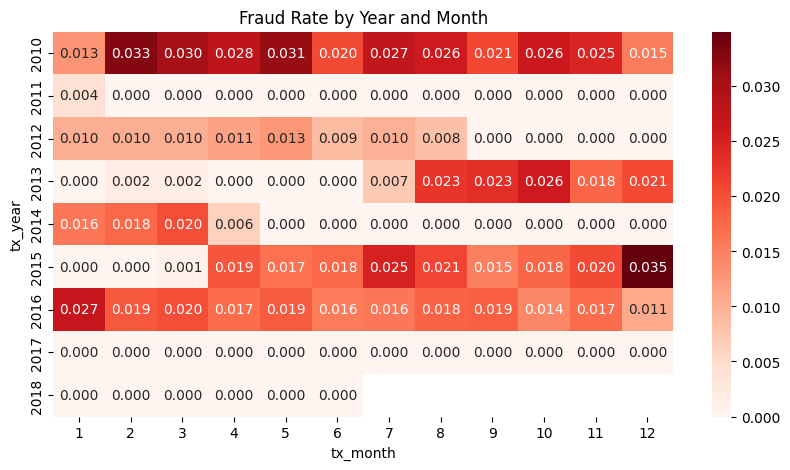

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="Reds")
plt.title("Fraud Rate by Year and Month")
plt.show()


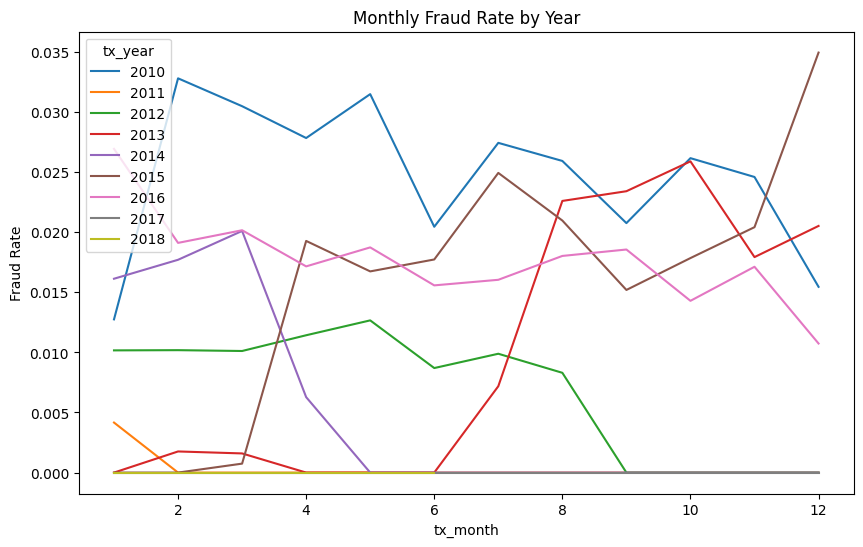

In [ ]:
pivot.T.plot(figsize=(10,6))
plt.title("Monthly Fraud Rate by Year")
plt.ylabel("Fraud Rate")
plt.show()

In [ ]:
df.groupby("tx_year")["fraud"].mean()

tx_year
2010    0.024646
2011    0.000358
2012    0.006798
2013    0.010230
2014    0.005029
2015    0.015966
2016    0.017711
2017    0.000000
2018    0.000000
Name: fraud, dtype: float64

In [ ]:
df.groupby("tx_year").size()

tx_year
2010     88819
2011     92251
2012     97669
2013    104106
2014    106776
2015    112679
2016    113265
2017    112967
2018     53611
dtype: int64

학습: 2010–2016만 (라벨 있는 구간)

검증: 2016(또는 2015–2016)로 PR-AUC/Recall 튜닝

운영 점검: 2017–2018로 FP rate / score drift 모니터링

---

# is_weekend

In [ ]:
df_nf = data[data["fraud"==0]].copy()
df_f = data[data["fraud"==1]].copy()

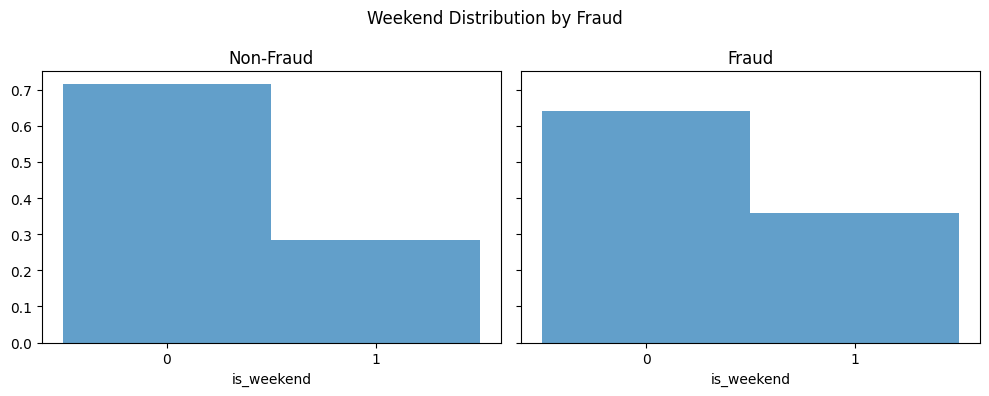

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_weekend"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_weekend")

ax2.hist(df_f["is_weekend"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_weekend")

plt.suptitle("Weekend Distribution by Fraud")
plt.tight_layout()
plt.show()

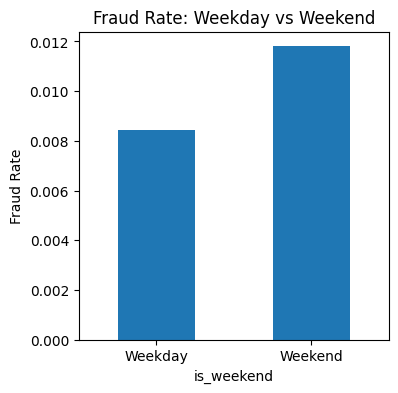

is_weekend
0    0.008440
1    0.011806
Name: fraud, dtype: float64


In [ ]:
fraud_rate_weekend = df.groupby("is_weekend")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_weekend.plot(kind="bar")
plt.ylabel("Fraud Rate")
plt.xticks([0,1], ["Weekday", "Weekend"], rotation=0)
plt.title("Fraud Rate: Weekday vs Weekend")
plt.show()

print(fraud_rate_weekend)

In [ ]:
evaluate_numeric_feature_safe(df, "is_weekend")

KS_p          1.142529e-36
MW_p          2.574774e-46
Cohen_d       1.540184e-01
Odds_Ratio    1.378214e+00
Logit_p       6.033792e-46
PR_AUC        1.064848e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# Paid
- is_credit
- is_prepaid

### credit

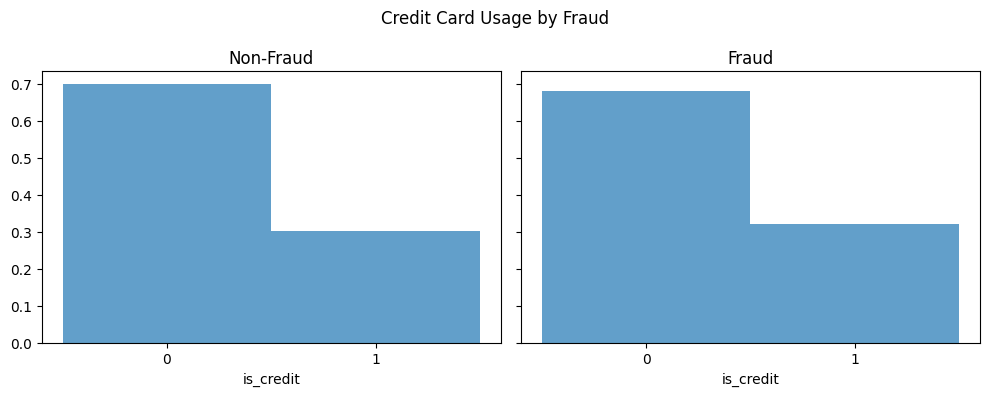

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_credit"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_credit")

ax2.hist(df_f["is_credit"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_credit")

plt.suptitle("Credit Card Usage by Fraud")
plt.tight_layout()
plt.show()


In [96]:
evaluate_numeric_feature_safe(df, "is_credit")

KS_p               0.004001
MW_p               0.000125
Cohen_d            0.041353
Odds_Ratio         1.092655
Logit_p            0.000125
PR_AUC             0.010006
n             886255.000000
pos_rate           0.009810
dtype: float64

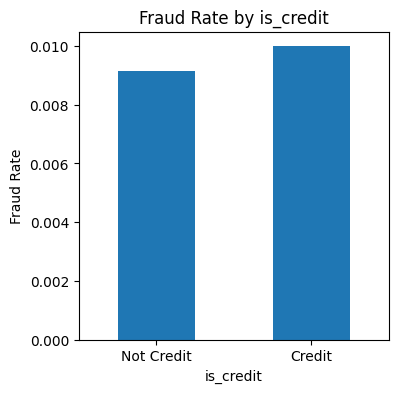

is_credit
0    0.009145
1    0.009995
Name: fraud, dtype: float64


In [ ]:
fraud_rate_credit = df.groupby("is_credit")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_credit.plot(kind="bar")
plt.xticks([0,1], ["Not Credit", "Credit"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by is_credit")
plt.show()

print(fraud_rate_credit)

### is_prepaid

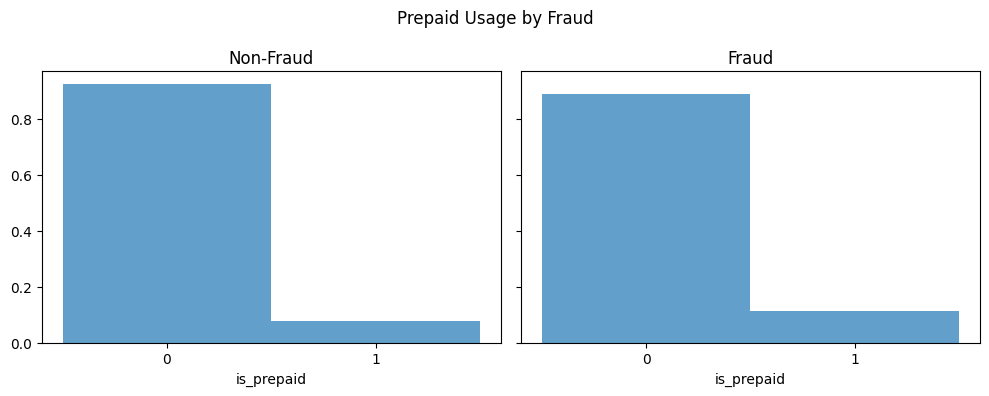

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["is_prepaid"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("is_prepaid")

ax2.hist(df_f["is_prepaid"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("is_prepaid")

plt.suptitle("Prepaid Usage by Fraud")
plt.tight_layout()
plt.show()


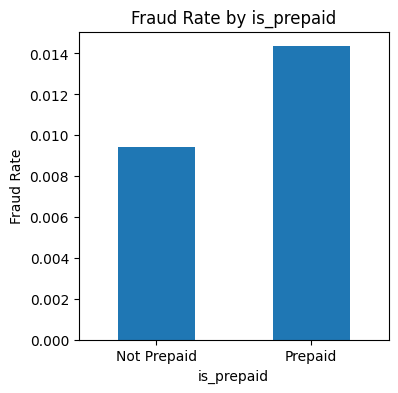

is_prepaid
0    0.009434
1    0.014352
Name: fraud, dtype: float64


In [98]:
fraud_rate_prepaid = df.groupby("is_prepaid")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_prepaid.plot(kind="bar")
plt.xticks([0,1], ["Not Prepaid", "Prepaid"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by is_prepaid")
plt.show()

print(fraud_rate_prepaid)

In [99]:
evaluate_numeric_feature_safe(df, "is_prepaid")

KS_p          5.503617e-10
MW_p          9.674576e-36
Cohen_d       1.345122e-01
Odds_Ratio    1.528867e+00
Logit_p       3.063807e-35
PR_AUC        1.031761e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

---

# Male

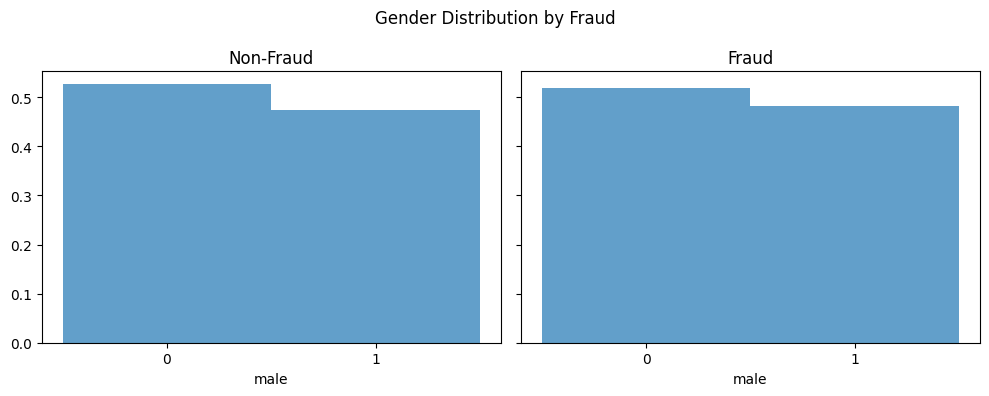

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

ax1.hist(df_nf["male"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax1.set_xticks([0, 1])
ax1.set_title("Non-Fraud")
ax1.set_xlabel("male")

ax2.hist(df_f["male"], bins=[-0.5, 0.5, 1.5],
         density=True, alpha=0.7)
ax2.set_xticks([0, 1])
ax2.set_title("Fraud")
ax2.set_xlabel("male")

plt.suptitle("Gender Distribution by Fraud")
plt.tight_layout()
plt.show()


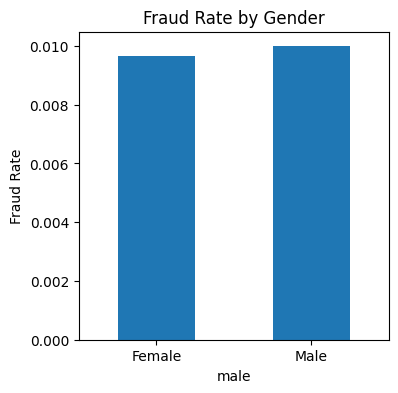

male
0    0.009654
1    0.009983
Name: fraud, dtype: float64


In [101]:
fraud_rate_gender = df.groupby("male")["fraud"].mean()

plt.figure(figsize=(4,4))
fraud_rate_gender.plot(kind="bar")
plt.xticks([0,1], ["Female", "Male"], rotation=0)
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Gender")
plt.show()

print(fraud_rate_gender)


In [102]:
evaluate_numeric_feature_safe(df, "male")

KS_p               0.571079
MW_p               0.117406
Cohen_d            0.016875
Odds_Ratio         1.034349
Logit_p            0.117423
PR_AUC             0.009893
n             886255.000000
pos_rate           0.009810
dtype: float64

---

# MCCG
- mccg_Food_Daily
- mccg_Transport_Travel 
- mccg_Digital_Online
- mccg_Financial 
- mccg_Retail  
- mccg_Medical
- mccg_Entertainment
- mccg_Automotive_Home
- mccg_Utilities_Government
- mccg_Professional_Services  
- mccg_Industrial_/_Manufacturing

In [103]:
mccg_cols = [
    "mccg_Food_Daily",
    "mccg_Transport_Travel",
    "mccg_Digital_Online",
    "mccg_Financial",
    "mccg_Retail",
    "mccg_Medical",
    "mccg_Entertainment",
    "mccg_Automotive_Home",
    "mccg_Utilities_Government",
    "mccg_Professional_Services",
    "mccg_Industrial_/_Manufacturing",
]

fraud_rate_by_mccg = {}

for col in mccg_cols:
    fraud_rate_by_mccg[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_mccg = (
    pd.Series(fraud_rate_by_mccg)
    .sort_values(ascending=False)
)

print(fraud_rate_by_mccg)

mccg_Industrial_/_Manufacturing    1.000000
mccg_Retail                        0.093548
mccg_Financial                     0.046914
mccg_Food_Daily                    0.044477
mccg_Automotive_Home               0.020705
mccg_Entertainment                 0.013109
mccg_Digital_Online                0.006405
mccg_Transport_Travel              0.001716
mccg_Utilities_Government          0.000966
mccg_Professional_Services         0.000000
mccg_Medical                            NaN
dtype: float64


In [104]:
df.groupby("is_prepaid")["mccg_Industrial_/_Manufacturing"].mean()


is_prepaid
0    0.000909
1    0.001713
Name: mccg_Industrial_/_Manufacturing, dtype: float64

In [105]:
df.groupby("mccg_Industrial_/_Manufacturing")["fraud"].mean()

mccg_Industrial_/_Manufacturing
0    0.008848
1    1.000000
Name: fraud, dtype: float64

In [106]:
df["mccg_Industrial_/_Manufacturing"].value_counts() 

mccg_Industrial_/_Manufacturing
0    885395
1       860
Name: count, dtype: int64

In [107]:
df[df["mccg_Industrial_/_Manufacturing"] == 1][["fraud"]].value_counts()

fraud
1        860
Name: count, dtype: int64

In [108]:
df[df["fraud"] == 1]["mccg_Industrial_/_Manufacturing"].mean()

np.float64(0.09891879457096849)

In [ ]:
fraud_rate_by_mccg = {}

for col in mccg_cols:
    fraud_rate_by_mccg[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_mccg = (
    pd.Series(fraud_rate_by_mccg)
    .sort_values(ascending=False)
)

print(fraud_rate_by_mccg)


mccg_Industrial_/_Manufacturing    1.000000
mccg_Retail                        0.093548
mccg_Financial                     0.046917
mccg_Food_Daily                    0.044477
mccg_Automotive_Home               0.017624
mccg_Entertainment                 0.013109
mccg_Digital_Online                0.006192
mccg_Transport_Travel              0.001533
mccg_Utilities_Government          0.000966
mccg_Professional_Services         0.000000
mccg_Medical                            NaN
dtype: float64


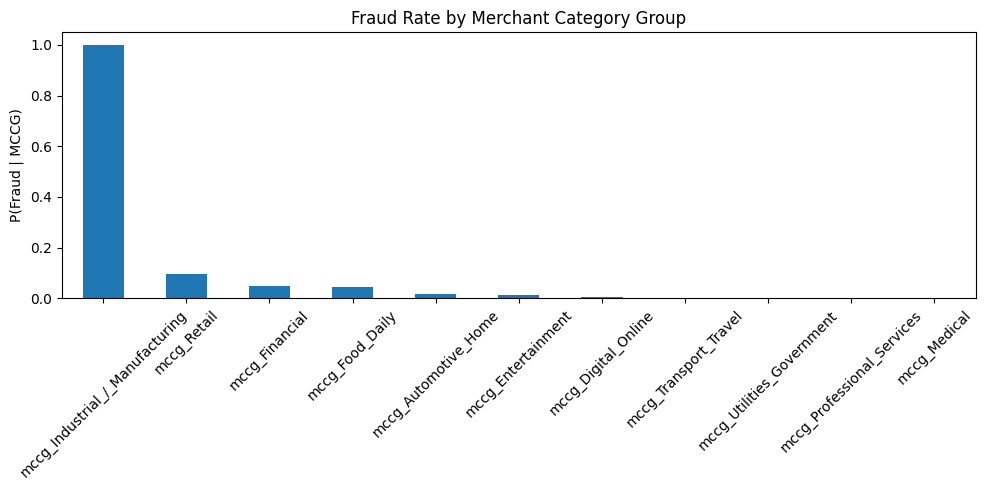

In [ ]:
fraud_rate_by_mccg.plot(kind="bar", figsize=(10,5))
plt.ylabel("P(Fraud | MCCG)")
plt.title("Fraud Rate by Merchant Category Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

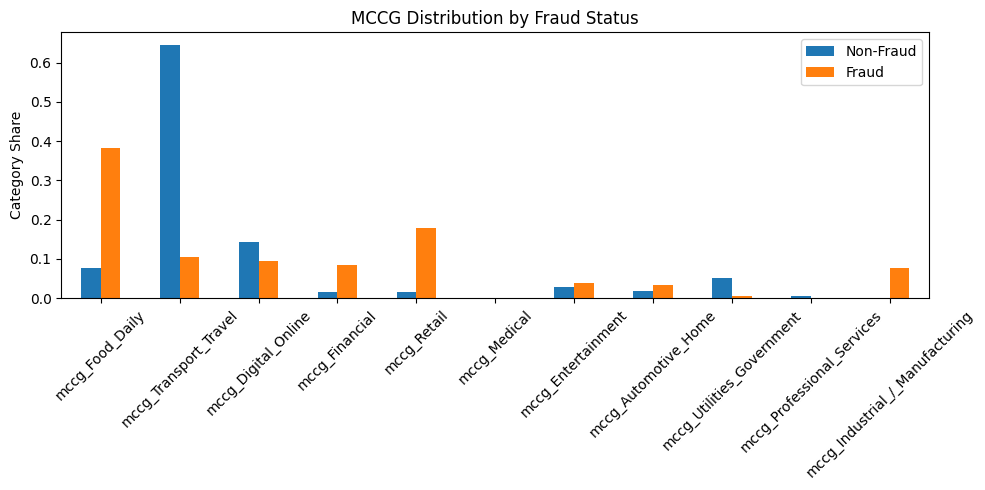

In [ ]:
nf_rate = df[df["fraud"]==0][mccg_cols].mean()
f_rate  = df[df["fraud"]==1][mccg_cols].mean()

compare = pd.DataFrame({
    "Non-Fraud": nf_rate,
    "Fraud": f_rate
})

compare.plot(kind="bar", figsize=(10,5))
plt.ylabel("Category Share")
plt.title("MCCG Distribution by Fraud Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
mccg_cols

['mccg_Food_Daily',
 'mccg_Transport_Travel',
 'mccg_Digital_Online',
 'mccg_Financial',
 'mccg_Retail',
 'mccg_Medical',
 'mccg_Entertainment',
 'mccg_Automotive_Home',
 'mccg_Utilities_Government',
 'mccg_Professional_Services',
 'mccg_Industrial_/_Manufacturing']

In [ ]:
results = {}

for col in mccg_cols:
    print(f"Evaluating: {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

mccg_results = pd.DataFrame(results).T
mccg_results = mccg_results.sort_values("PR_AUC", ascending=False)

mccg_results


Evaluating: mccg_Food_Daily
Evaluating: mccg_Transport_Travel
Evaluating: mccg_Digital_Online
Evaluating: mccg_Financial
Evaluating: mccg_Retail
Evaluating: mccg_Medical


/tmp/ipykernel_3899198/3739477011.py:18: RuntimeWarning: invalid value encountered in scalar divide
  return (x.mean() - z.mean()) / pooled_std


Evaluating: mccg_Entertainment
Evaluating: mccg_Automotive_Home
Evaluating: mccg_Utilities_Government
Evaluating: mccg_Professional_Services


/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Evaluating: mccg_Industrial_/_Manufacturing


/home/nakyung/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
mccg_Industrial_/_Manufacturing,8.384151e-44,0.000000e+00,2.997670,2.982054e+11,9.895116e-01,0.086566,882143.0,0.009401
mccg_Retail,3.584919e-187,0.000000e+00,1.226630,1.300732e+01,0.000000e+00,0.024347,882143.0,0.009401
mccg_Food_Daily,0.000000e+00,0.000000e+00,1.123800,7.324705e+00,0.000000e+00,0.022822,882143.0,0.009401
mccg_Financial,1.465782e-34,0.000000e+00,0.532934,5.579184e+00,0.000000e+00,0.012613,882143.0,0.009401
mccg_Automotive_Home,3.102351e-02,2.249527e-27,0.119595,1.921559e+00,1.754673e-26,0.009679,882143.0,0.009401
mccg_Entertainment,2.596274e-01,9.523676e-10,0.067493,1.415841e+00,1.153209e-09,0.009545,882143.0,0.009401
mccg_Medical,1.000000e+00,1.000000e+00,NaN,NaN,NaN,0.009401,882143.0,0.009401
mccg_Professional_Services,9.972750e-01,1.514614e-09,-0.066672,4.146520e-06,8.787914e-01,0.009401,882143.0,0.009401
mccg_Utilities_Government,2.284057e-15,6.310839e-80,-0.208911,9.715482e-02,1.891526e-52,0.009357,882143.0,0.009401
mccg_Digital_Online,1.021524e-17,3.331202e-37,-0.140627,6.209273e-01,1.514169e-36,0.009099,882143.0,0.009401


In [122]:
original["mccg_Professional_Services"].value_counts()

mccg_Professional_Services
0    886872
1      3896
Name: count, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, roc_auc_score


LABEL = "fraud"
COL_IND = "mccg_Industrial_/_Manufacturing"


def _make_strat_sample(df, n_total=200_000, n_pos=5_000, seed=42):
    """fraud는 최대 n_pos까지 포함, 나머지는 non-fraud로 채워 strat 샘플 구성"""
    df_pos = df[df[LABEL] == 1]
    df_neg = df[df[LABEL] == 0]

    n_pos = min(n_pos, len(df_pos), n_total // 2)  # 안전장치
    n_neg = n_total - n_pos

    df_pos_s = df_pos.sample(n=n_pos, random_state=seed) if n_pos > 0 else df_pos.head(0)
    df_neg_s = df_neg.sample(n=n_neg, random_state=seed)

    out = pd.concat([df_pos_s, df_neg_s], axis=0).sample(frac=1.0, random_state=seed).reset_index(drop=True)
    return out


def eval_logit_numeric_only_fast(
    df: pd.DataFrame,
    drop_cols=(),
    n_sample=200_000,      
    n_pos=5_000,
    seed=42,
    max_iter=120,          
    tol=1e-2,
    C=0.3,
    solver="saga",         
    verbose=0
):
    t = tqdm(total=9, desc=f"logit ablation drop={drop_cols if drop_cols else '(none)'}", leave=False)

    # 0) 샘플링
    if n_sample is not None and n_sample < len(df):
        df_use = _make_strat_sample(df, n_total=n_sample, n_pos=n_pos, seed=seed)
    else:
        df_use = df
    t.update(1)

    # 1) y / X
    y = df_use[LABEL].astype(int).to_numpy()
    X = df_use.drop(columns=[LABEL], errors="ignore").drop(columns=list(drop_cols), errors="ignore")
    t.update(1)

    # 2) Interval 컬럼 drop
    interval_cols = [c for c in X.columns if pd.api.types.is_interval_dtype(X[c])]
    X = X.drop(columns=interval_cols, errors="ignore")
    t.update(1)

    # 3) numeric만
    num_cols = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c])]
    X = X[num_cols]
    t.update(1)

    # 4) split
    X_tr, X_va, y_tr, y_va = train_test_split(
        X, y, test_size=0.2, random_state=seed, stratify=y
    )
    t.update(1)

    # 5) pipeline
    pipe = Pipeline([
        ("imp", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", LogisticRegression(
            solver=solver,
            max_iter=max_iter,
            tol=tol,
            C=C,
            class_weight="balanced",
            n_jobs=-1 if solver in ("saga", "sag") else None,
            verbose=verbose
        )),
    ])
    t.update(1)

    # 6) fit
    t.set_postfix_str("fit...")
    pipe.fit(X_tr, y_tr)
    t.update(1)

    # 7) predict
    t.set_postfix_str("predict...")
    p = pipe.predict_proba(X_va)[:, 1]
    t.update(1)

    # 8) metrics
    pr_auc = average_precision_score(y_va, p)
    roc_auc = roc_auc_score(y_va, p)
    t.update(1)
    t.close()

    clf = pipe.named_steps["clf"]
    n_iter = int(clf.n_iter_[0]) if hasattr(clf, "n_iter_") else None

    return {
        "drop": ",".join(drop_cols) if drop_cols else "(none)",
        "rows_used": int(len(df_use)),
        "pos_rate_used": float(df_use[LABEL].mean()),
        "n_num_features": int(X.shape[1]),
        "PR_AUC": float(pr_auc),
        "ROC_AUC": float(roc_auc),
        "n_iter": n_iter,
        "hit_max_iter": (n_iter is not None and n_iter >= max_iter),
        "settings": f"solver={solver},max_iter={max_iter},tol={tol},C={C}"
    }


# ---- 실행 ----
res_A = eval_logit_numeric_only_fast(df, drop_cols=(), n_sample=200_000, n_pos=5_000, max_iter=120, tol=1e-2, C=0.3, solver="saga", verbose=0)
res_B = eval_logit_numeric_only_fast(df, drop_cols=(COL_IND,), n_sample=200_000, n_pos=5_000, max_iter=120, tol=1e-2, C=0.3, solver="saga", verbose=0)

pd.DataFrame([res_A, res_B])


logit ablation drop=(none):   0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_4029588/2117274563.py:59: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  interval_cols = [c for c in X.columns if pd.api.types.is_interval_dtype(X[c])]


logit ablation drop=('mccg_Industrial_/_Manufacturing',):   0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_4029588/2117274563.py:59: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  interval_cols = [c for c in X.columns if pd.api.types.is_interval_dtype(X[c])]


,drop,rows_used,pos_rate_used,n_num_features,PR_AUC,ROC_AUC,n_iter,hit_max_iter,settings
0,(none),200000,0.025,56,0.331162,0.888170,54,False,"solver=saga,max_iter=120,tol=0.01,C=0.3"
1,mccg_Industrial_/_Manufacturing,200000,0.025,55,0.187745,0.871529,51,False,"solver=saga,max_iter=120,tol=0.01,C=0.3"


In [118]:
pwd

'/home/nakyung/projects/BDAIFin'

In [119]:
original = pd.read_parquet("data/split/online")

In [120]:
res_A = eval_logit_numeric_only_fast(original, drop_cols=(), n_sample=200_000, n_pos=5_000, max_iter=120, tol=1e-2, C=0.3, solver="saga", verbose=0)
res_B = eval_logit_numeric_only_fast(original, drop_cols=(COL_IND,), n_sample=200_000, n_pos=5_000, max_iter=120, tol=1e-2, C=0.3, solver="saga", verbose=0)

pd.DataFrame([res_A, res_B])

logit ablation drop=(none):   0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_4029588/2117274563.py:59: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  interval_cols = [c for c in X.columns if pd.api.types.is_interval_dtype(X[c])]


logit ablation drop=('mccg_Industrial_/_Manufacturing',):   0%|          | 0/9 [00:00<?, ?it/s]

/tmp/ipykernel_4029588/2117274563.py:59: DeprecationWarning: is_interval_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.IntervalDtype)` instead
  interval_cols = [c for c in X.columns if pd.api.types.is_interval_dtype(X[c])]


,drop,rows_used,pos_rate_used,n_num_features,PR_AUC,ROC_AUC,n_iter,hit_max_iter,settings
0,(none),200000,0.025,57,0.314085,0.897268,58,False,"solver=saga,max_iter=120,tol=0.01,C=0.3"
1,mccg_Industrial_/_Manufacturing,200000,0.025,56,0.174658,0.878170,50,False,"solver=saga,max_iter=120,tol=0.01,C=0.3"


In [ ]:
X = df.drop(columns=["fraud"])
print("n_rows, n_cols:", X.shape)
print("pos_rate:", df["fraud"].mean())

n_rows, n_cols: (886255, 58)
pos_rate: 0.009809817716120078


In [121]:
original["mccg_Industrial_/_Manufacturing"].mean()

np.float64(0.0009654590196324969)

---

# card type
- cb_Visa 
- cb_Mastercard
- cb_Amex
- cb_Discover  

In [123]:
card_cols = [
    "cb_Visa",
    "cb_Mastercard",
    "cb_Amex",
    "cb_Discover",
]

fraud_rate_by_card = {}

for col in card_cols:
    fraud_rate_by_card[col] = df[df[col] == 1]["fraud"].mean()

fraud_rate_by_card = (
    pd.Series(fraud_rate_by_card)
    .sort_values(ascending=False)
)

print(fraud_rate_by_card)


cb_Discover      0.014896
cb_Amex          0.010280
cb_Mastercard    0.009755
cb_Visa          0.009478
dtype: float64


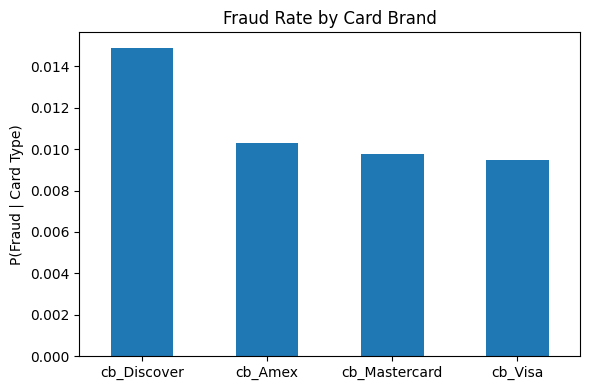

In [124]:
fraud_rate_by_card.plot(kind="bar", figsize=(6,4))
plt.ylabel("P(Fraud | Card Type)")
plt.title("Fraud Rate by Card Brand")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

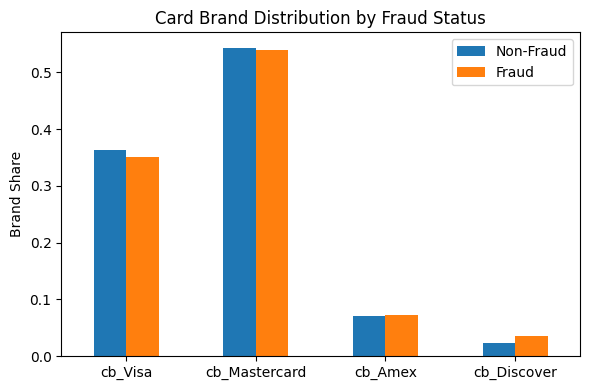

In [125]:
nf_rate = df[df["fraud"]==0][card_cols].mean()
f_rate  = df[df["fraud"]==1][card_cols].mean()

compare = pd.DataFrame({
    "Non-Fraud": nf_rate,
    "Fraud": f_rate
})

compare.plot(kind="bar", figsize=(6,4))
plt.ylabel("Brand Share")
plt.title("Card Brand Distribution by Fraud Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [126]:
results = {}

for col in card_cols:
    print(f"Evaluating: {col}")
    results[col] = evaluate_numeric_feature_safe(df, col)

mccg_results = pd.DataFrame(results).T
mccg_results = mccg_results.sort_values("PR_AUC", ascending=False)

mccg_results

Evaluating: cb_Visa
Evaluating: cb_Mastercard
Evaluating: cb_Amex
Evaluating: cb_Discover


,KS_p,MW_p,Cohen_d,Odds_Ratio,Logit_p,PR_AUC,n,pos_rate
cb_Discover,0.157012,7.249958e-14,0.080656,1.545475,1.130049e-13,0.009989,886255.0,0.00981
cb_Amex,0.999966,2.181874e-01,0.013271,1.052256,2.182365e-01,0.009844,886255.0,0.00981
cb_Mastercard,0.999997,5.658901e-01,-0.006188,0.987661,5.658923e-01,0.009780,886255.0,0.00981
cb_Visa,0.138169,1.644189e-02,-0.025856,0.947292,1.645465e-02,0.009693,886255.0,0.00981


# has_chip

In [133]:
df["has_chip"].value_counts()

has_chip
1    807866
0     78389
Name: count, dtype: int64

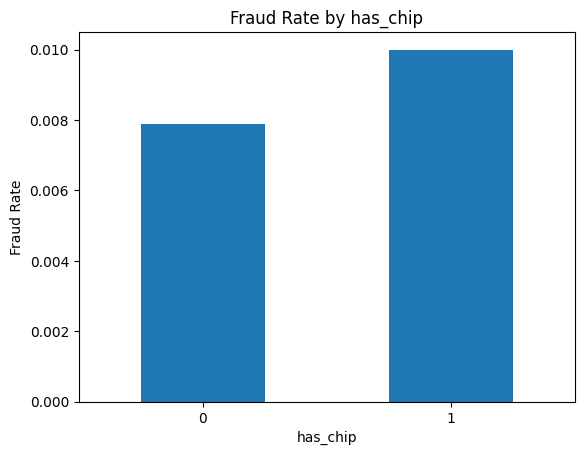

In [134]:
fraud_rate = df.groupby("has_chip")["fraud"].mean()

fraud_rate.plot(kind="bar")
plt.title("Fraud Rate by has_chip")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=0)
plt.show()

In [135]:
evaluate_numeric_feature_safe(df, "has_chip")

KS_p          9.229643e-03
MW_p          7.984931e-09
Cohen_d       6.217596e-02
Odds_Ratio    1.272954e+00
Logit_p       8.668743e-09
PR_AUC        9.984594e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [136]:
df2["ratio_income_capita"] = df2["yearly_income"] / (df2["per_capita_income"] + 1)
evaluate_numeric_feature_safe(df2, "ratio_income_capita")

KS_p          6.530721e-24
MW_p          3.181190e-01
Cohen_d       7.832796e-02
Odds_Ratio    1.000692e+00
Logit_p       7.044772e-12
PR_AUC        1.143880e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [138]:
evaluate_numeric_feature_safe(df, "per_capita_income")

KS_p          4.351682e-99
MW_p          3.211124e-92
Cohen_d      -1.639521e-01
Odds_Ratio    9.999811e-01
Logit_p       4.599938e-55
PR_AUC        8.366101e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [139]:
evaluate_numeric_feature_safe(df, "yearly_income")


KS_p          3.683555e-66
MW_p          2.449577e-65
Cohen_d      -1.454785e-01
Odds_Ratio    9.999926e-01
Logit_p       6.114908e-43
PR_AUC        8.547841e-03
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [140]:
evaluate_numeric_feature_safe(df, "has_error")

KS_p          3.951599e-04
MW_p          2.202722e-43
Cohen_d       1.488631e-01
Odds_Ratio    2.029144e+00
Logit_p       1.069030e-41
PR_AUC        1.023405e-02
n             8.862550e+05
pos_rate      9.809818e-03
dtype: float64

In [141]:
evaluate_numeric_feature_safe(original, "has_error")

KS_p          3.971936e-04
MW_p          2.375623e-43
Cohen_d       1.488006e-01
Odds_Ratio    2.028530e+00
Logit_p       1.145835e-41
PR_AUC        1.018199e-02
n             8.907680e+05
pos_rate      9.760117e-03
dtype: float64

In [142]:
original.loc[original["fraud"]==1, "has_error"].mean()


np.float64(0.04485852311939269)

In [144]:
df["distance_imputed"]

0         0
1         0
2         0
3         0
4         0
         ..
178149    0
178150    0
178151    0
178152    0
178153    0
Name: distance_imputed, Length: 886255, dtype: int8

In [189]:
X = df[["month_sin", "month_cos"]]
X = sm.add_constant(X)
y = df["fraud"]

model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.063177
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:               715565
Model:                          Logit   Df Residuals:                   715562
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Feb 2026   Pseudo R-squ.:               0.0001111
Time:                        21:20:33   Log-Likelihood:                -45207.
converged:                       True   LL-Null:                       -45212.
Covariance Type:            nonrobust   LLR p-value:                  0.006572
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4470      0.011   -402.195      0.000      -4.469      -4.425
month_sin     -0.0489      0.

---

In [183]:
data = pd.read_parquet("data/dataset")

In [184]:
df = data.copy()

In [185]:
df.columns

Index(['client_id', 'card_id', 'current_age', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'has_chip', 'credit_limit', 'year_pin_last_changed',
       'err_bad_card_number', 'err_bad_expiration', 'err_bad_cvv',
       'err_insufficient_balance', 'months_to_expire', 'tx_year', 'tx_month',
       'tx_hour', 'is_weekend', 'is_credit', 'is_prepaid', 'male',
       'mccg_Food_Daily', 'mccg_Transport_Travel', 'mccg_Digital_Online',
       'mccg_Financial', 'mccg_Retail', 'mccg_Entertainment',
       'mccg_Automotive_Home', 'mccg_Utilities_Government',
       'mccg_Professional_Services', 'mccg_Industrial_/_Manufacturing',
       'cb_Visa', 'cb_Mastercard', 'cb_Amex', 'cb_Discover', 'fraud',
       'log_amount', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

# correlation

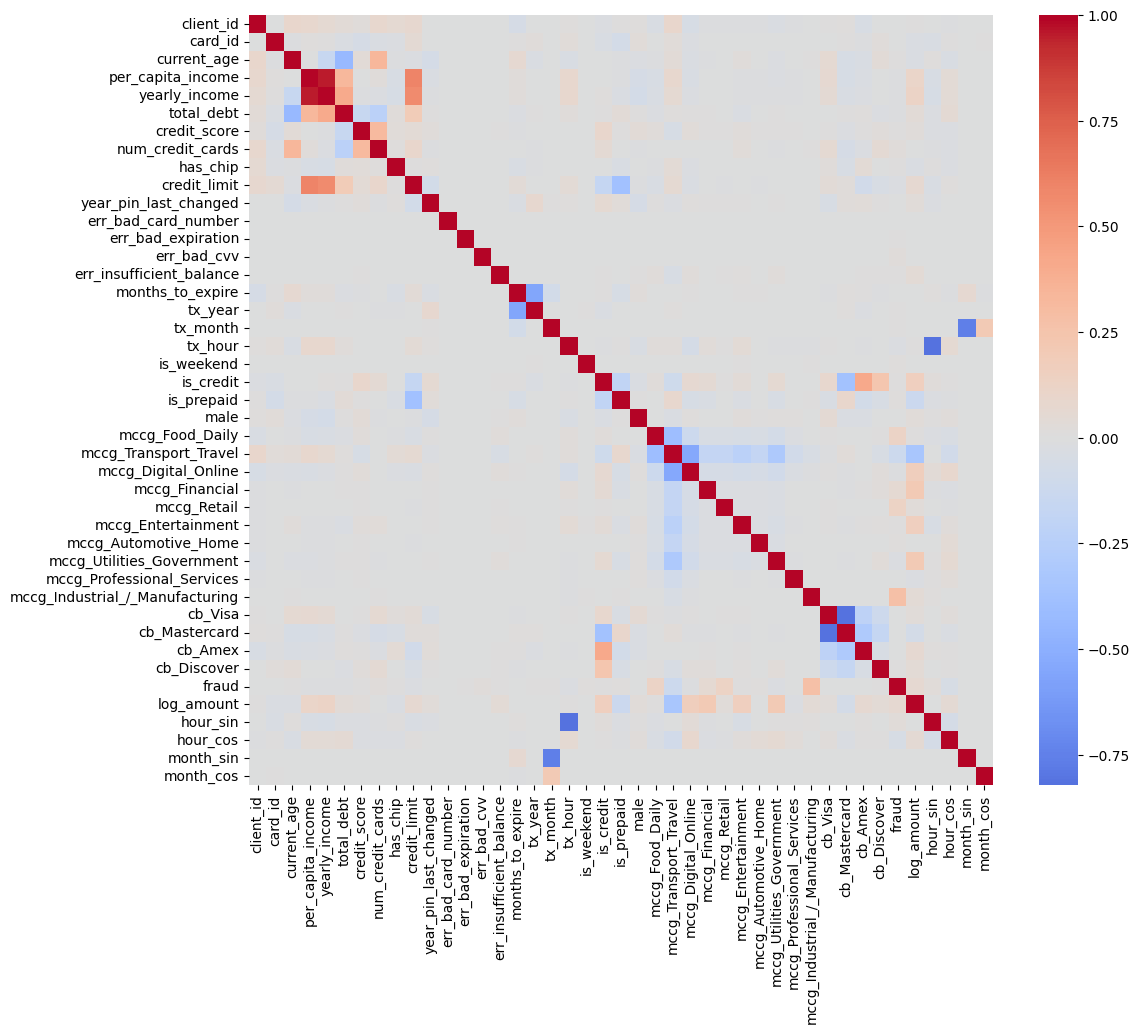

In [186]:
corr = df[df.columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()


In [187]:
# numeric 컬럼만
corr = df.corr(numeric_only=True)

# 상삼각행렬 (자기 자신/중복 제거)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

corr_pairs = (
    corr.where(mask)
        .stack()
        .reset_index()
        .rename(columns={
            "level_0": "feature_1",
            "level_1": "feature_2",
            0: "corr"
        })
)

# 절댓값 컬럼 추가
corr_pairs["abs_corr"] = corr_pairs["corr"].abs()

# 절댓값 기준 정렬
corr_pairs = corr_pairs.sort_values("abs_corr", ascending=False)

corr_pairs.head(20)

,feature_1,feature_2,corr,abs_corr
123,per_capita_income,yearly_income,0.951771,0.951771
623,tx_hour,hour_sin,-0.821860,0.821860
858,cb_Visa,cb_Mastercard,-0.821771,0.821771
601,tx_month,month_sin,-0.760185,0.760185
128,per_capita_income,credit_limit,0.595111,0.595111
166,yearly_income,credit_limit,0.565267,0.565267
525,months_to_expire,tx_year,-0.558329,0.558329
732,mccg_Transport_Travel,mccg_Digital_Online,-0.542721,0.542721
85,current_age,total_debt,-0.431437,0.431437
664,is_credit,cb_Amex,0.420927,0.420927


In [188]:
df.columns

Index(['client_id', 'card_id', 'current_age', 'per_capita_income',
       'yearly_income', 'total_debt', 'credit_score', 'num_credit_cards',
       'has_chip', 'credit_limit', 'year_pin_last_changed',
       'err_bad_card_number', 'err_bad_expiration', 'err_bad_cvv',
       'err_insufficient_balance', 'months_to_expire', 'tx_year', 'tx_month',
       'tx_hour', 'is_weekend', 'is_credit', 'is_prepaid', 'male',
       'mccg_Food_Daily', 'mccg_Transport_Travel', 'mccg_Digital_Online',
       'mccg_Financial', 'mccg_Retail', 'mccg_Entertainment',
       'mccg_Automotive_Home', 'mccg_Utilities_Government',
       'mccg_Professional_Services', 'mccg_Industrial_/_Manufacturing',
       'cb_Visa', 'cb_Mastercard', 'cb_Amex', 'cb_Discover', 'fraud',
       'log_amount', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

log(amount)\
cvv error\
mcc industrial, manufacturing\
is_prepaid\
hour_sin, cos

=> fraud와 양의 상관관계